In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# EDA (Exploratory Data Analysis)

Загрузим датасет

In [2]:
url = 'https://data.open-power-system-data.org/time_series/2020-10-06/'
datafile = url + 'time_series_60min_singleindex.csv'
df_all = pd.read_csv(datafile, index_col='utc_timestamp', parse_dates=True, low_memory=False)

Очистим данные от timezone

In [3]:
df_all.index = df_all.index.tz_localize(None)

Посмотрим на данные

In [4]:
df_all.head()

cet_cest_timestamp  \
utc_timestamp                                   
2014-12-31 23:00:00  2015-01-01T00:00:00+0100   
2015-01-01 00:00:00  2015-01-01T01:00:00+0100   
2015-01-01 01:00:00  2015-01-01T02:00:00+0100   
2015-01-01 02:00:00  2015-01-01T03:00:00+0100   
2015-01-01 03:00:00  2015-01-01T04:00:00+0100   

                     AT_load_actual_entsoe_transparency  \
utc_timestamp                                             
2014-12-31 23:00:00                                 NaN   
2015-01-01 00:00:00                              5946.0   
2015-01-01 01:00:00                              5726.0   
2015-01-01 02:00:00                              5347.0   
2015-01-01 03:00:00                              5249.0   

                     AT_load_forecast_entsoe_transparency  AT_price_day_ahead  \
utc_timestamp                                                                   
2014-12-31 23:00:00                                   NaN                 NaN   
2015-01-01 00:00:00                                6701.0                35.0   
2015-01-01 01:00:00                                6593.0                45.0   
2015-01-01 02:00:00                                6482.0                41.0   
2015-01-01 03:00:00                                6454.0                38.0   

                     AT_solar_generation_actual  \
utc_timestamp                                     
2014-12-31 23:00:00                         NaN   
2015-01-01 00:00:00                         NaN   
2015-01-01 01:00:00                         NaN   
2015-01-01 02:00:00                         NaN   
2015-01-01 03:00:00                         NaN   

                     AT_wind_onshore_generation_actual  \
utc_timestamp                                            
2014-12-31 23:00:00                                NaN   
2015-01-01 00:00:00                               69.0   
2015-01-01 01:00:00                               64.0   
2015-01-01 02:00:00                               65.0   
2015-01-01 03:00:00                               64.0   

                     BE_load_actual_entsoe_transparency  \
utc_timestamp                                             
2014-12-31 23:00:00                                 NaN   
2015-01-01 00:00:00                              9484.0   
2015-01-01 01:00:00                              9152.0   
2015-01-01 02:00:00                              8799.0   
2015-01-01 03:00:00                              8567.0   

                     BE_load_forecast_entsoe_transparency  \
utc_timestamp                                               
2014-12-31 23:00:00                                   NaN   
2015-01-01 00:00:00                                9897.0   
2015-01-01 01:00:00                                9521.0   
2015-01-01 02:00:00                                9135.0   
2015-01-01 03:00:00                                8909.0   

                     BE_solar_generation_actual  BE_wind_generation_actual  \
utc_timestamp                                                                
2014-12-31 23:00:00                         NaN                        NaN   
2015-01-01 00:00:00                         NaN                        NaN   
2015-01-01 01:00:00                         NaN                     734.81   
2015-01-01 02:00:00                         NaN                     766.64   
2015-01-01 03:00:00                         NaN                     733.13   

                     ...  SI_load_actual_entsoe_transparency  \
utc_timestamp        ...                                       
2014-12-31 23:00:00  ...                                 NaN   
2015-01-01 00:00:00  ...                                 NaN   
2015-01-01 01:00:00  ...                             1045.47   
2015-01-01 02:00:00  ...                             1004.79   
2015-01-01 03:00:00  ...                              983.79   

                     SI_load_forecast_entsoe_transparency  \
utc_timestamp                        

### Helpers

In [5]:
def extract_country(df_all, country_code, year_min=None, year_max=None):
    """Extract data for a single country"""

    # List of columns to extract
    columns = [col for col in df_all.columns if col.startswith(country_code)]

    # Extract columns and remove country codes from column labels
    columns_map = {col : col[3:] for col in columns}
    df_out = df_all[columns].rename(columns=columns_map)

    # Exclude years outside of specified range, if any
    if year_min is not None:
        df_out = df_out[df_out.index.year >= year_min]
    if year_max is not None:
        df_out = df_out[df_out.index.year <= year_max]

    return df_out

def transform_dataframe(df, cols_map):
    # Rename columns for convenience
    df = df[list(cols_map.keys())].rename(columns=cols_map)
    # Convert from MW to GW
    df = df / 1000
#     df = df.groupby(df.index.hour).mean()
    df = df.rename_axis('Date')

    return df

Для анализа была выбрана Испания

In [6]:
df_hrly = extract_country(df_all, country_code='ES', year_min=2015, year_max=2020)
df_hrly.sample(3)


load_actual_entsoe_transparency  \
utc_timestamp                                          
2017-03-30 09:00:00                          31883.0   
2017-03-14 11:00:00                          33669.0   
2015-08-24 11:00:00                          32037.0   

                     load_forecast_entsoe_transparency  \
utc_timestamp                                            
2017-03-30 09:00:00                            32234.0   
2017-03-14 11:00:00                            32883.0   
2015-08-24 11:00:00                            33282.0   

                     solar_generation_actual  wind_onshore_generation_actual  
utc_timestamp                                                                 
2017-03-30 09:00:00                   3702.0                          5917.0  
2017-03-14 11:00:00                   1980.0                         12650.0  
2015-08-24 11:00:00                   3348.0                          6763.0

In [7]:
cols_map = {'load_actual_entsoe_transparency': 'Consumption',
            'wind_onshore_generation_actual': 'Wind',
            'solar_generation_actual': 'Solar'}
df = transform_dataframe(df_hrly, cols_map).dropna()

Проведем предварительный анализ

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 50373 entries, 2015-01-01 01:00:00 to 2020-09-30 22:00:00
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Consumption  50373 non-null  float64
 1   Wind         50373 non-null  float64
 2   Solar        50373 non-null  float64
dtypes: float64(3)
memory usage: 1.5 MB


In [9]:
df.sample(10)

Consumption   Wind  Solar
Date                                          
2017-07-15 19:00:00       31.312  6.951  1.002
2018-01-15 07:00:00       36.481  4.000  0.053
2019-12-28 16:00:00       25.842  1.578  1.395
2019-09-09 12:00:00       32.307  2.977  5.961
2018-08-25 11:00:00       30.406  3.416  5.131
2015-11-14 05:00:00       21.548  2.881  0.061
2015-09-10 23:00:00       24.041  1.303  0.311
2020-02-11 20:00:00       34.149  2.952  0.011
2020-05-28 17:00:00       26.841  3.929  4.904
2018-04-10 01:00:00       23.447  9.430  0.084

Добавим общее производство "зеленой" энергии


In [10]:
# df wind + solar generation
df['Green'] = df[['Wind', 'Solar']].sum(axis=1, skipna=False)
df.head()

Consumption   Wind  Solar  Green
Date                                                 
2015-01-01 01:00:00       22.734  5.461  0.050  5.511
2015-01-01 02:00:00       21.286  5.238  0.050  5.288
2015-01-01 03:00:00       20.264  4.935  0.042  4.977
2015-01-01 04:00:00       19.905  4.618  0.034  4.652
2015-01-01 05:00:00       20.010  4.397  0.034  4.431


Добавим общее производство искапаемой энергии




In [11]:
# df['Fossil'] = df['Consumption'] - df['Green']
# df.head()

Визуализируем наши данные

In [12]:
df.to_parquet('../data/es_clf_data.parquet', compression='gzip', engine='pyarrow')

In [13]:
df.to_csv('../data/es_clf_data.csv',)

## Визуализация данных

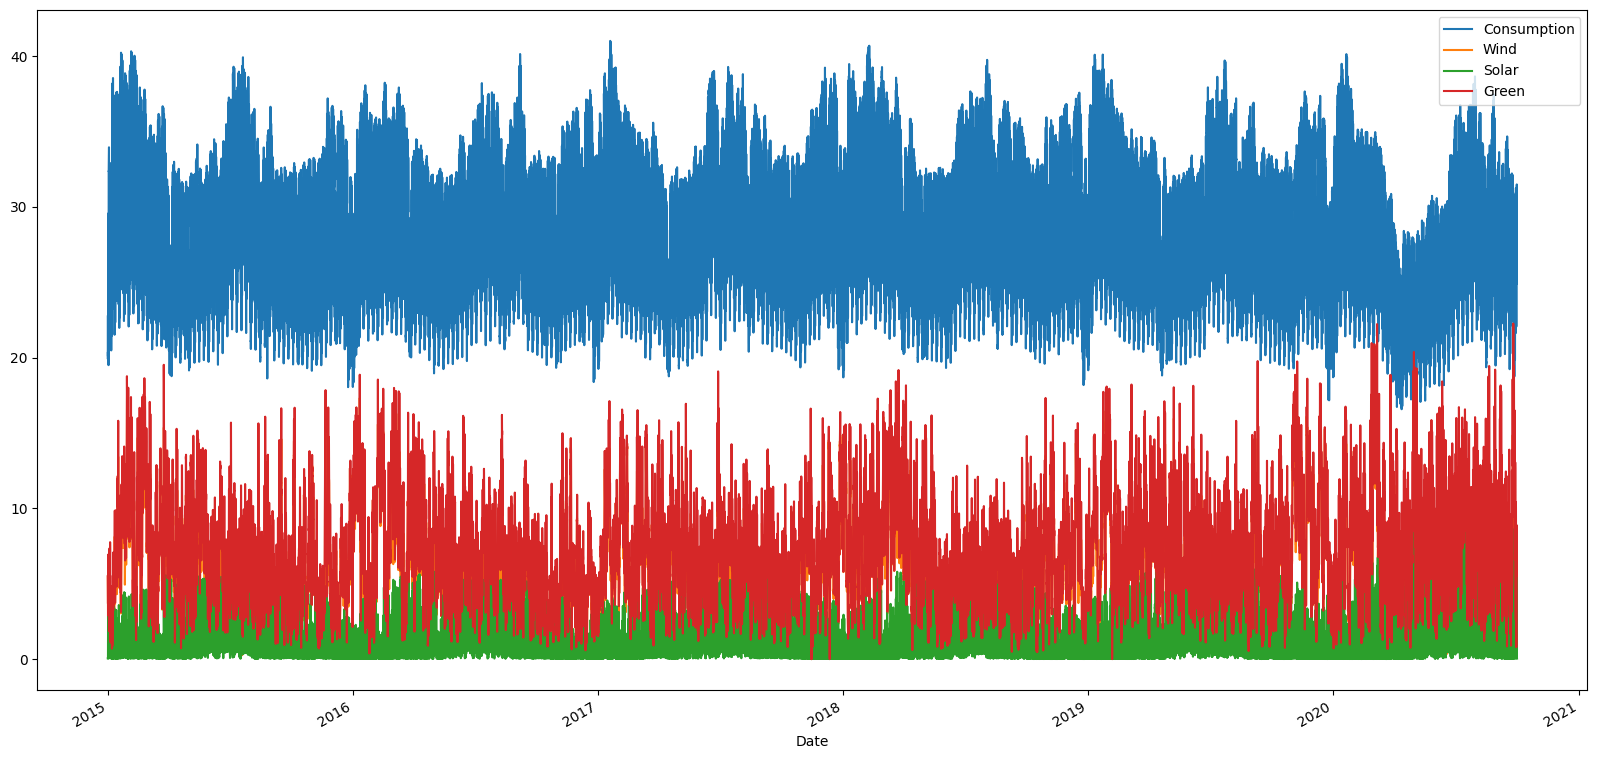

In [14]:
df.plot(figsize=(20, 10))
plt.show()


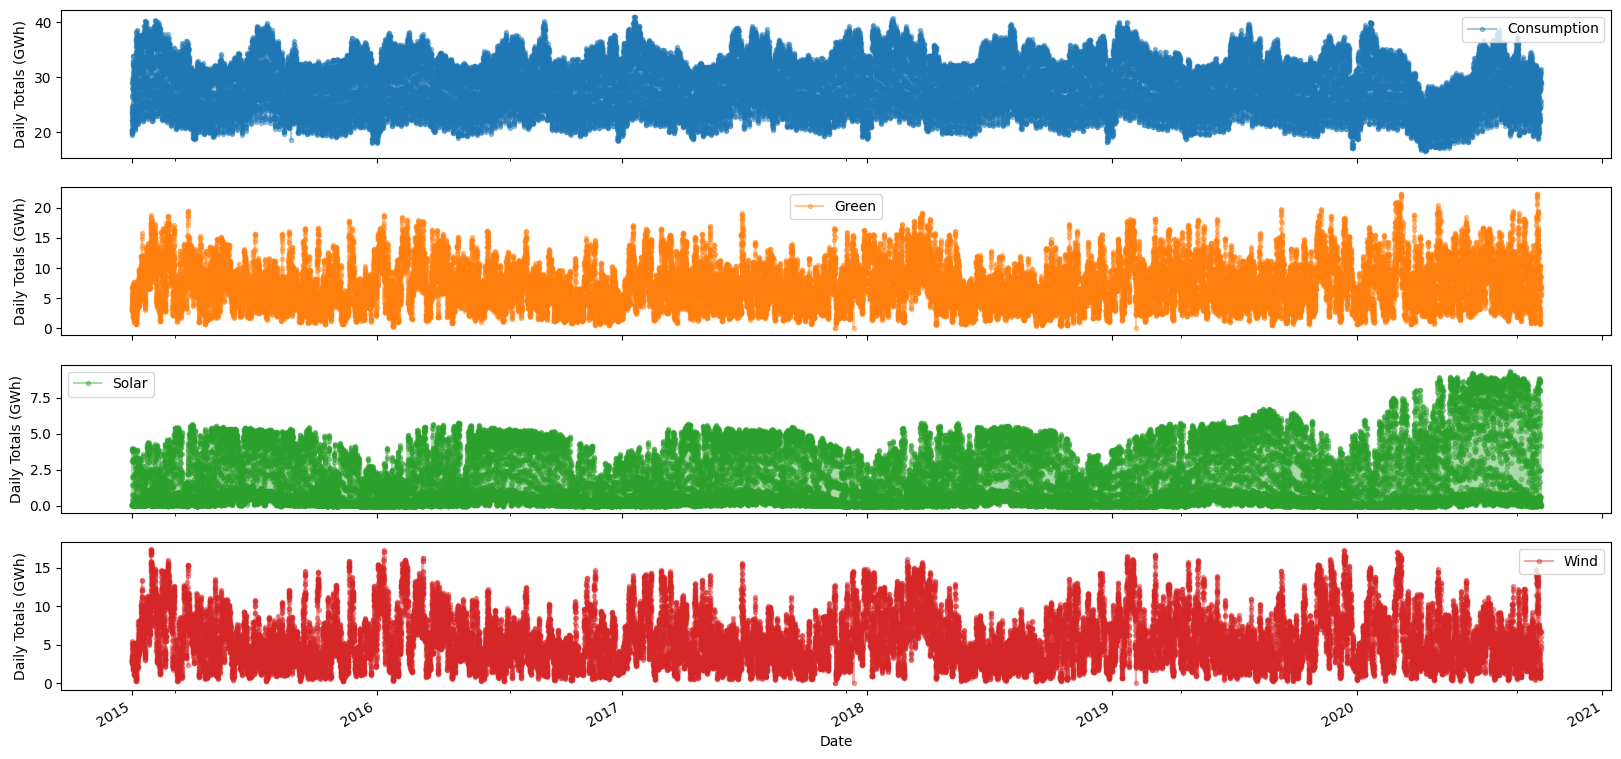

In [15]:
cols_plot = ['Consumption', 'Green', 'Solar', 'Wind',]
axes = df[cols_plot].plot(marker='.', alpha=0.4, linestyle='-', figsize=(20, 10), subplots=True)
for ax in axes:
    ax.set_ylabel('Daily Totals (GWh)')

Визуализируем производство зеленой энергии и общего потребления

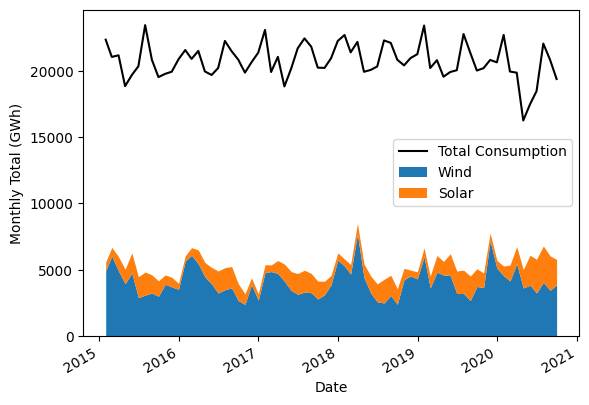

In [16]:
import matplotlib.dates as mdates
df_monthly = df.resample('M').sum(min_count=7)


fig, ax = plt.subplots()
ax.plot(df_monthly['Consumption'], color='black', label='Total Consumption')

df_monthly[['Wind', 'Solar', ]].plot.area(ax=ax, linewidth=0)

ax.xaxis.set_major_locator(mdates.YearLocator())
ax.legend()
ax.set_ylabel('Monthly Total (GWh)');

В данных есть что-то похожее не сезонность

## График распределения потребления энергии

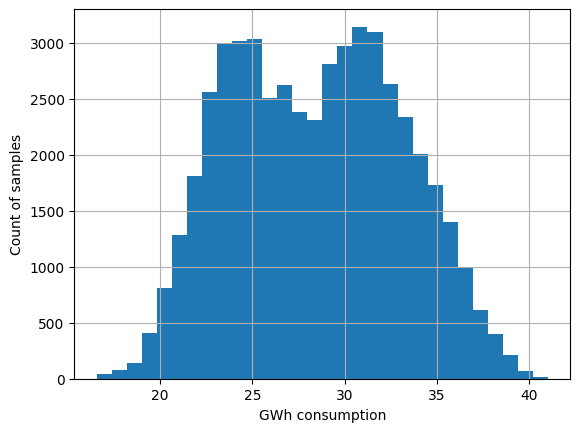

In [17]:
ax = df.Consumption.hist(bins=30)

ax.set_ylabel('Count of samples')
ax.set_xlabel('GWh consumption')
plt.show()

График распределения потребления двухмодальный. Пики потребления около 24-25 ГВт и 31-32 ГВт

## График производства зеленой энергии

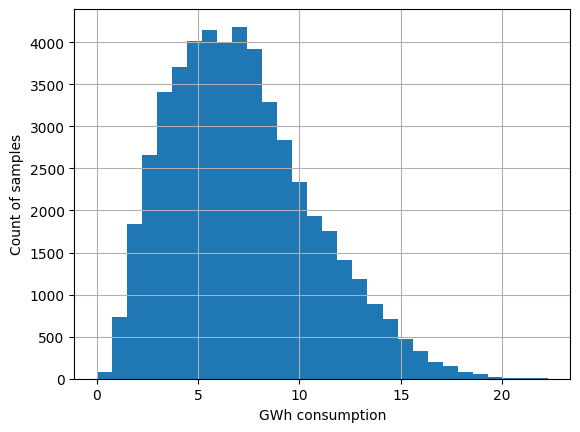

In [18]:
ax = df.Green.hist(bins=30)

ax.set_ylabel('Count of samples')
ax.set_xlabel('GWh consumption')
plt.show()

## График потребления энергии за последний квартал 2019 года

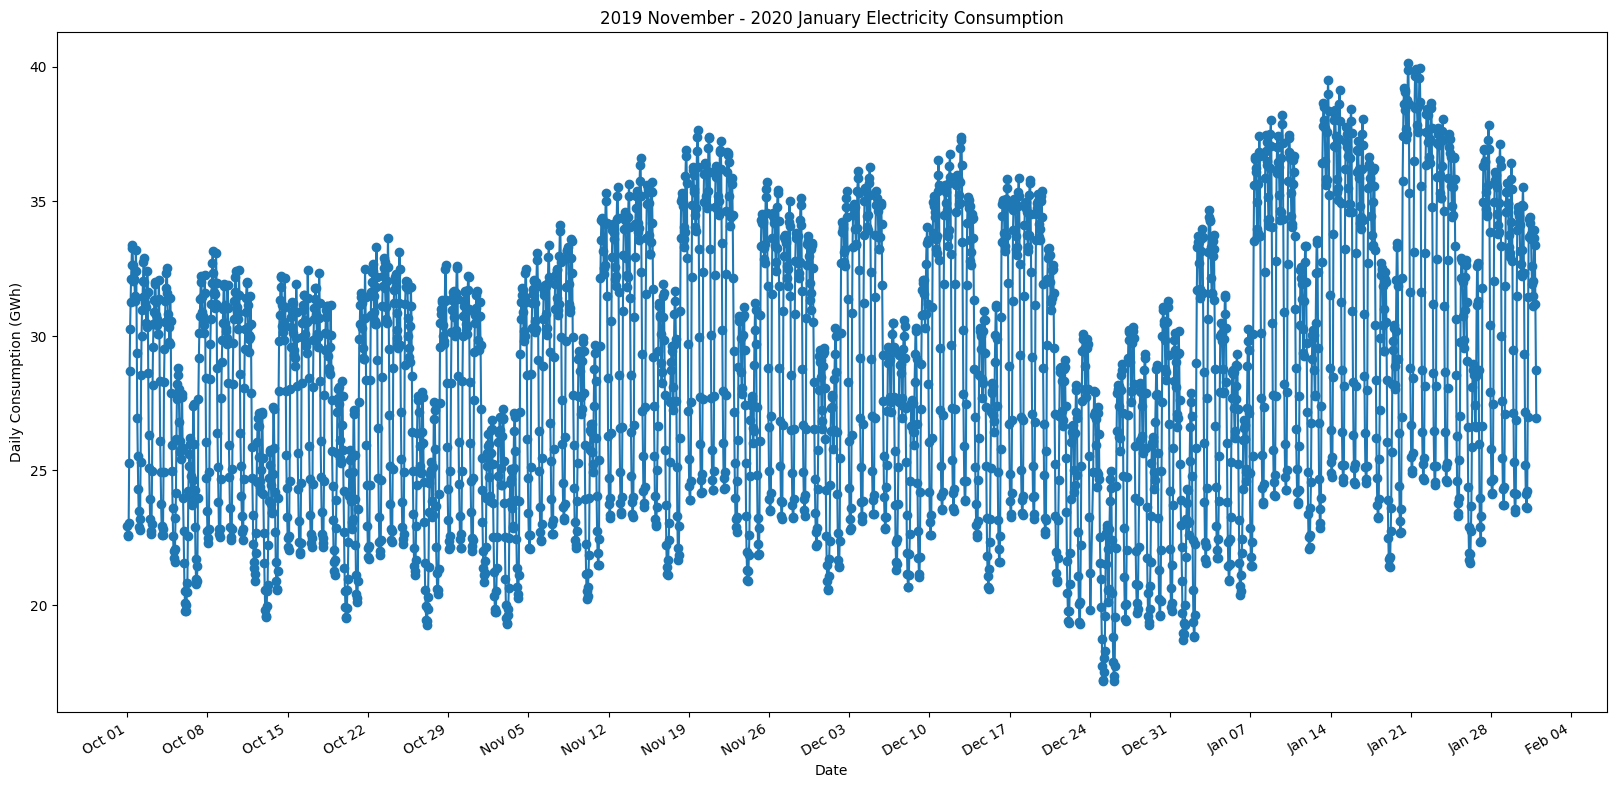

In [19]:
ax = df.loc['2019-10':'2020-01', 'Consumption'].plot(marker='o', linestyle='-', figsize=(20, 10))
ax.set_ylabel('Daily Consumption (GWh)')
ax.set_title('2019 November - 2020 January Electricity Consumption')

# For more convinient ticks (week ticks)
ax.xaxis.set_major_locator(mdates.WeekdayLocator())
# Format 3-letter month name and day number
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))

plt.show()

Спад потребления выпадает на выходные дни и праздники (католическое рождество, и новый год)



## График потребления энергии за 2017-2019 года

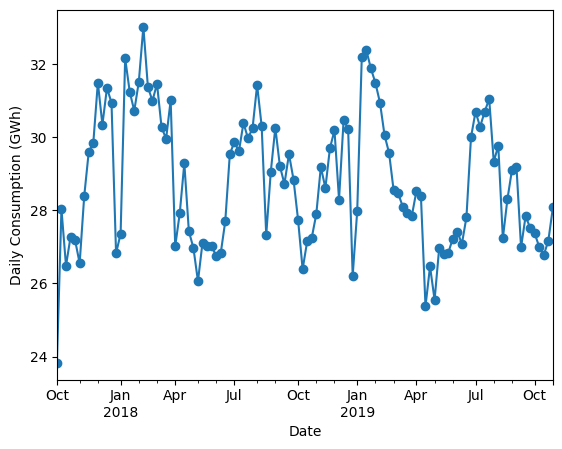

In [20]:
ax = df.loc['2017-10':'2019-10', 'Consumption'].resample('W').mean().plot(marker='o', linestyle='-',linewidth=1.5)
ax.set_ylabel('Daily Consumption (GWh)')
plt.show()

По графику скользящей средней видно, что имеется несколько минимумов потребления:
- май
- октябрь
- декабрь

Если обратиться к графику национальных праздничных дней в Испании, то они выпадают на эти месяцы

## График производства зеленой энергии c 2015 года

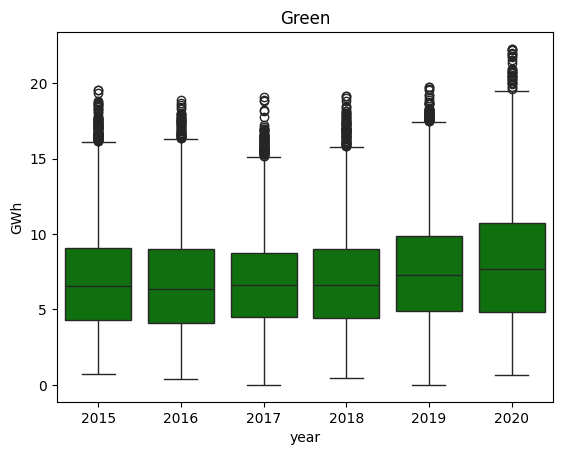

In [21]:
ax = sns.boxplot(data=df, x=df.index.year, y='Green', color='green')
ax.set_ylabel('GWh')
ax.set_xlabel('year')
ax.set_title('Green')
plt.show()


Наблюдается довольно большое количество выбросов, что скорее всего свидетельствует о очень солнечных днях или скорее об очень ветрянных днях.

<Axes: xlabel='Date'>

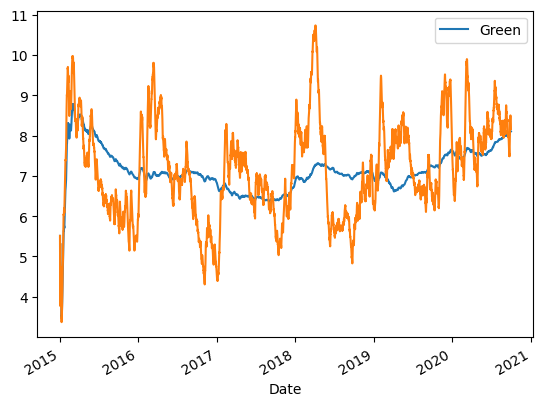

In [22]:
df[['Green']].rolling('365d').mean().plot( linewidth=1.5,)
df.Green.ewm(halflife=365, min_periods=0,adjust=True).mean().plot()

Производство энергии из возобновляемых источников напротив растет, выросло даже в период локдаунов

## Потребление энергии по годам

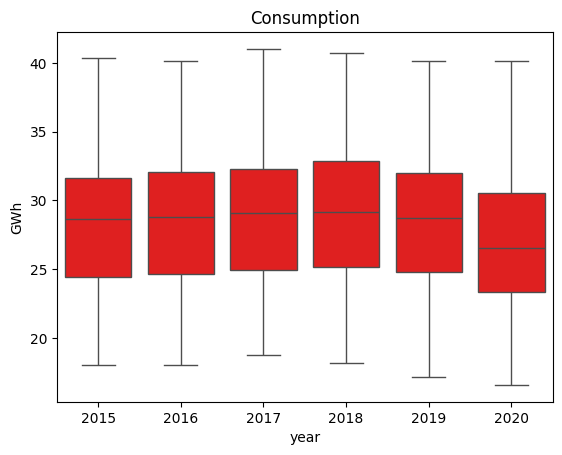

In [23]:
ax = sns.boxplot(data=df, x=df.index.year, y='Consumption', color='red')
ax.set_ylabel('GWh')
ax.set_xlabel('year')
ax.set_title('Consumption')
plt.show()

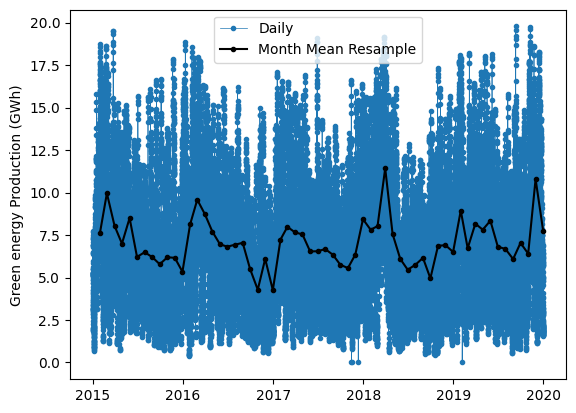

In [24]:
start, end = '2015-01', '2019-12'

fig, ax = plt.subplots()
ax.plot(df.loc[start:end, 'Green'],marker='.', linestyle='-', linewidth=0.5, label='Daily', )
ax.plot(df.resample('M').mean().loc[start:end, 'Green'], marker='o', markersize=3, linestyle='-', label='Month Mean Resample', color='k')
ax.set_ylabel('Green energy Production (GWh)')
ax.legend()

Есть какая-то сезонность, что и не удивительно для энергии из возобновляемых источников

## График производства зеленой энергии по месяцам

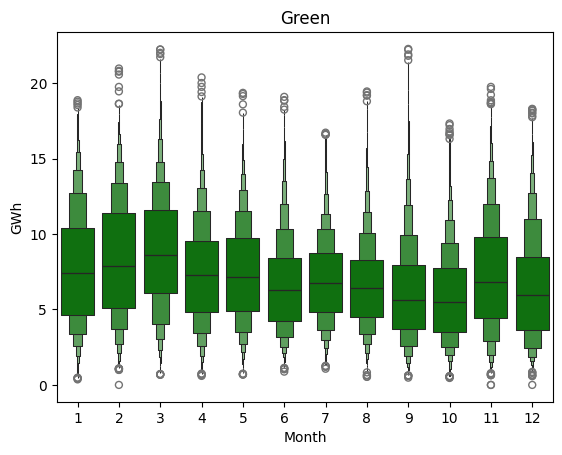

In [25]:
ax = sns.boxenplot(data=df, x=df.index.month, y='Green', color='Green')
ax.set_ylabel('GWh')
ax.set_xlabel('Month')
ax.set_title('Green')
plt.show()

Сезонность явно присутсвует, можно предположить, что в зимние месяцы производство энергии из солнечных батарей будет ниже, чем в летние, а ветряные мельницы будут работать лучше в зимние месяцы

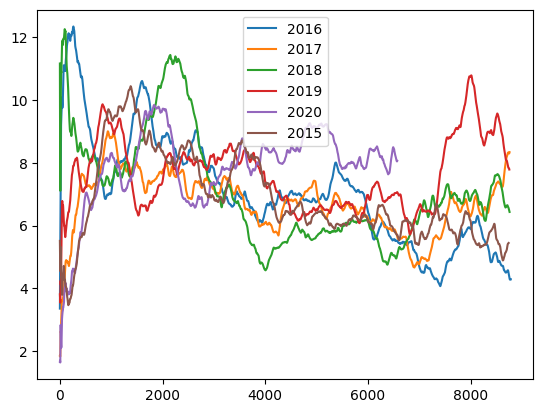

In [26]:
for year in list(set(df.index.year)):
    plt.plot(df.loc[str(year):str(year), 'Green'].rolling('30d').mean().values, label=year)

plt.legend()

Какие-то пересечения есть, но с уверенностью сказать нельзя

## График потребления энергии по дням недели

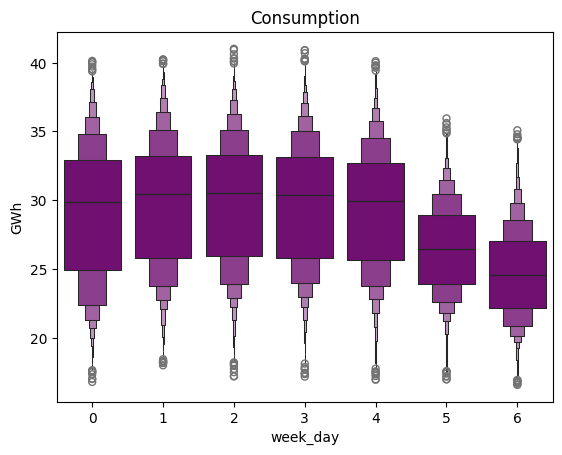

In [27]:
ax = sns.boxenplot(data=df, x=df.index.weekday, y='Consumption', color='purple')
ax.set_ylabel('GWh')
ax.set_xlabel('week_day')
ax.set_title('Consumption')
plt.show()

Потребление энергии в выходные дни ниже, чем в будние

## График производства энергии из возобновляемых источников по дням недели

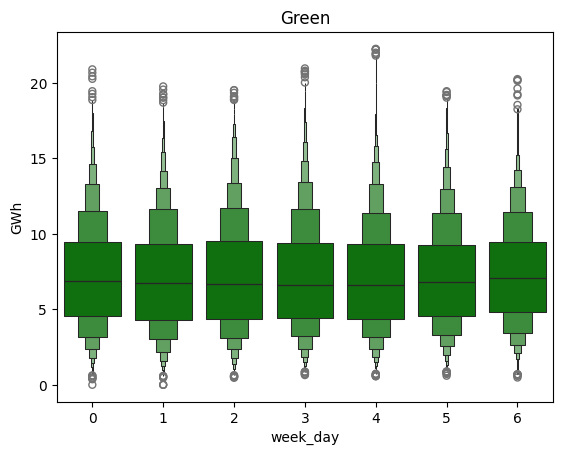

In [28]:
ax = sns.boxenplot(data=df, x=df.index.weekday, y='Green', color='green')
ax.set_ylabel('GWh')
ax.set_xlabel('week_day')
ax.set_title('Green')
plt.show()

Производство энергии из возобновляемых источников ровное  по неделе

# Прогнозирование

Обновим библиотеку SKTime и импортируем её

In [29]:
import sktime

In [30]:
import warnings
from statsmodels.tools.sm_exceptions import ConvergenceWarning
warnings.simplefilter('ignore', ConvergenceWarning)

In [31]:
from sktime.forecasting.model_selection import temporal_train_test_split
from sktime.forecasting.base import ForecastingHorizon
from sktime.forecasting.compose import make_reduction
from sktime.forecasting.model_selection import temporal_train_test_split
from sktime.forecasting.exp_smoothing import ExponentialSmoothing
from sktime.forecasting.naive import NaiveForecaster
from sktime.performance_metrics.forecasting import  MeanAbsolutePercentageError, MeanSquaredError
from sktime.utils.plotting import plot_series

warnings.simplefilter("ignore", FutureWarning)

### Helpers

In [32]:
def fenn_forbes_index(y_test, y_pred):
  """Индекс Фенна-Форбса (Fenn Forbes Index):"""
  error = y_test - y_pred
  mean_y_test = np.mean(y_test)
  sse = np.sum((y_test - mean_y_test) ** 2)
  ssr = np.sum(error ** 2)
  fenn_forbes = 1 - (ssr / sse)
  return fenn_forbes
smape = MeanAbsolutePercentageError(symmetric=True)
rmse  = MeanSquaredError(square_root=True)

### backup

In [33]:
df_bk = df.copy()

Выберем столбец потребления энергии  в качестве отдельного временного ряда.

В ходе анализа было установлено, что ряд имеет как минимум 2 составляющие (незначительную быструю, с периодом неделя и медленную с периодом 1 год). Для упрощения анализа удалим быструю составляющую.

In [34]:
y = df.Consumption.asfreq('7d')
y.head()

Date
2015-01-01 01:00:00    22.734
2015-01-08 01:00:00    24.481
2015-01-15 01:00:00    24.269
2015-01-22 01:00:00    25.675
2015-01-29 01:00:00    25.016
Freq: 7D, Name: Consumption, dtype: float64

(<Figure size 1600x400 with 1 Axes>, <Axes: ylabel='Consumption'>)

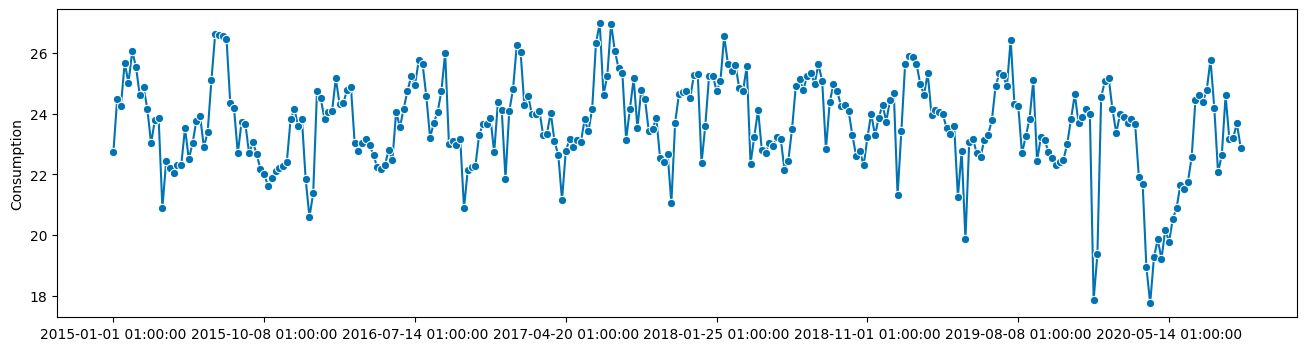

In [35]:
sktime.utils.plotting.plot_series(y)

## Разделение данных на тренировочную и тестовую выборки

Check splitted data size: Train: 180, Test: 120


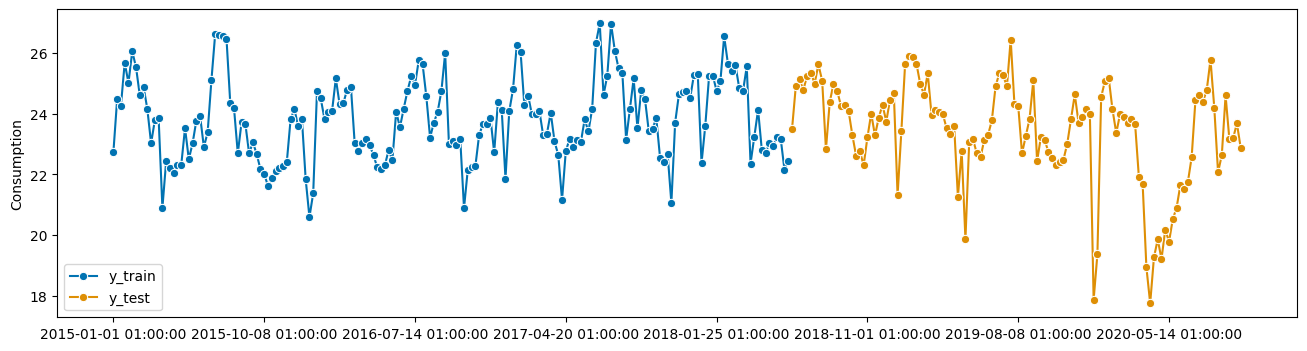

In [36]:
TEST_SIZE = int(0.4 * y.size)

y_train, y_test = temporal_train_test_split(y, test_size=TEST_SIZE)

print(f'Check splitted data size: Train: {y_train.shape[0]}, Test: {y_test.shape[0]}')

sktime.utils.plotting.plot_series(y_train, y_test, labels=["y_train", "y_test"]);

## Наивное сезонное предсказание

sMAPE = 0.043


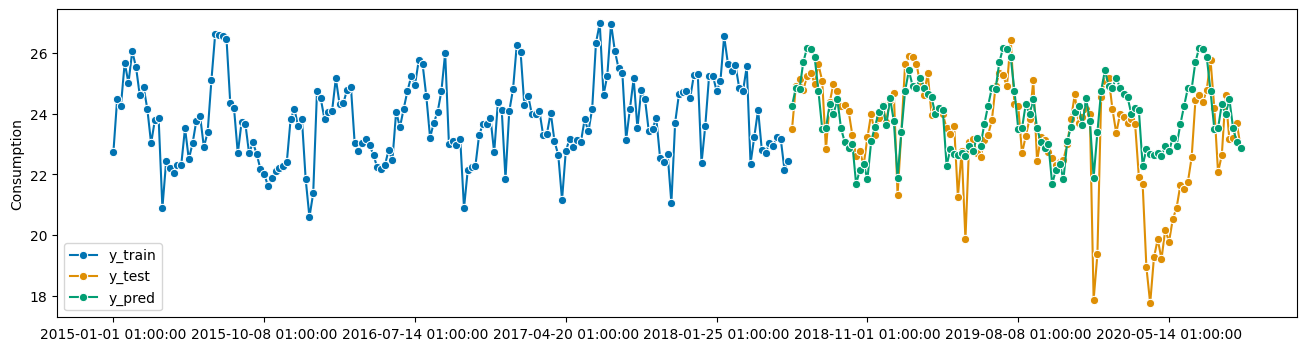

In [37]:
SEASON = 52 # 52 Недели в году
fh = ForecastingHorizon(y_test.index, is_relative=False)

forecaster = NaiveForecaster(strategy="mean", sp=SEASON)
forecaster.fit(y_train)

y_pred = forecaster.predict(fh)

plot_series(y_train, y_test, y_pred, labels=["y_train", "y_test", "y_pred"])

print(f'sMAPE = {smape(y_pred.values, y_test.values):.3f}')

**sMAPE=0.043** - означает, что в среднем абсолютная процентная ошибка между прогнозируемыми значениями и фактическими значениями составляет 0,4%. 

Это  низкое значение sMAPE, указывающее на то, что модель прогнозирования хорошо справляется с предсказаниями.

## Exponential Smoothing, Holt-Winter

Напишем простую функцию для выбора лучшей модели на основании экспоненциального сглаживания

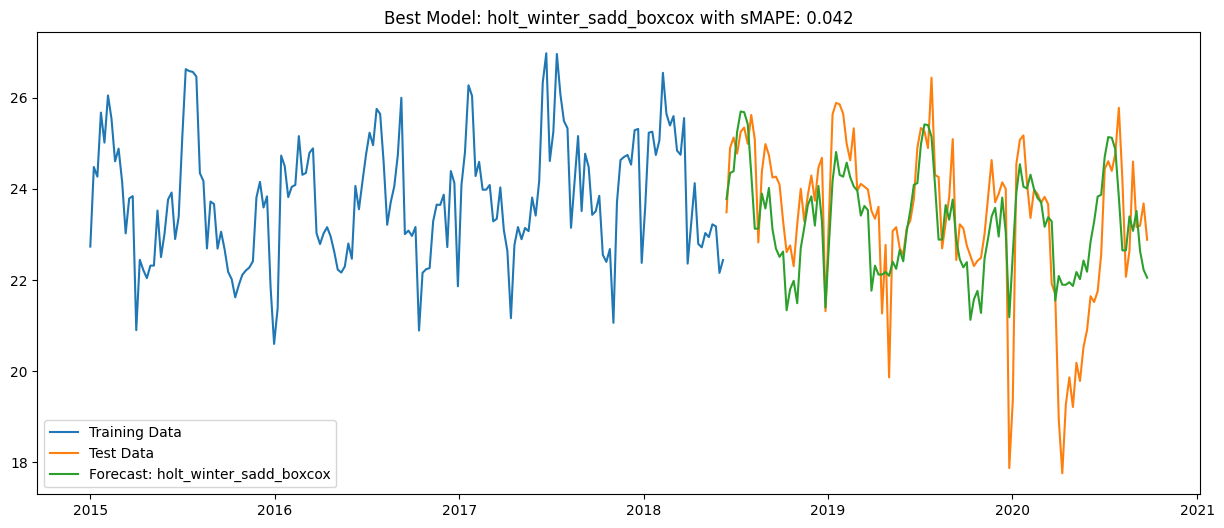

Best Model: holt_winter_sadd_boxcox with sMAPE: 0.042


In [38]:
ses = ExponentialSmoothing(sp=SEASON)
holt = ExponentialSmoothing(trend="add", damped_trend=False, sp=SEASON)
damped_holt = ExponentialSmoothing(trend="add", damped_trend=True, sp=SEASON)
holt_winter = ExponentialSmoothing(trend="add", seasonal="additive", sp=SEASON)
holt_winter_add_boxcox  = ExponentialSmoothing(trend="add", seasonal="additive", use_boxcox=True, sp=SEASON)
holt_winter_mul_boxcox  = ExponentialSmoothing(trend="mul", seasonal="additive", use_boxcox=True, sp=SEASON)
holt_winter_sadd_boxcox = ExponentialSmoothing(trend="add", seasonal="mul", use_boxcox=True, sp=SEASON)
holt_winter_smul_boxcox = ExponentialSmoothing(trend="mul", seasonal="mul", use_boxcox=True, sp=SEASON)

models = {
    "ses": ses,
    "holt": holt,
    "damped_holt": damped_holt,
    "holt_winter": holt_winter,
    "holt_winter_add_boxcox": holt_winter_add_boxcox,
    "holt_winter_mul_boxcox": holt_winter_mul_boxcox,
    "holt_winter_sadd_boxcox": holt_winter_sadd_boxcox,
    "holt_winter_smul_boxcox": holt_winter_smul_boxcox
}

best_model = None
best_smape = np.inf
best_forecast = None

for name, model in models.items():
    fitted_model = model.fit(y=y_train)
    y_pred = fitted_model.predict(fh=fh)
    
    # Calculate sMAPE
    smape_score = smape(y_test, y_pred)
    
    if smape_score < best_smape:
        best_smape = smape_score
        best_model = name
        best_forecast = y_pred

# Plotting
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 6))
plt.plot(y_train, label='Training Data')
plt.plot(y_test, label='Test Data')
plt.plot(best_forecast, label='Forecast: ' + best_model)
plt.title(f'Best Model: {best_model} with sMAPE: {best_smape:.3f}')
plt.legend()
plt.show()

print(f'Best Model: {best_model} with sMAPE: {best_smape:.3f}')


Результат почти такой-же как у наивного предсказания **sMAPE = 0.042**

## KNN

sMAPE = 0.053


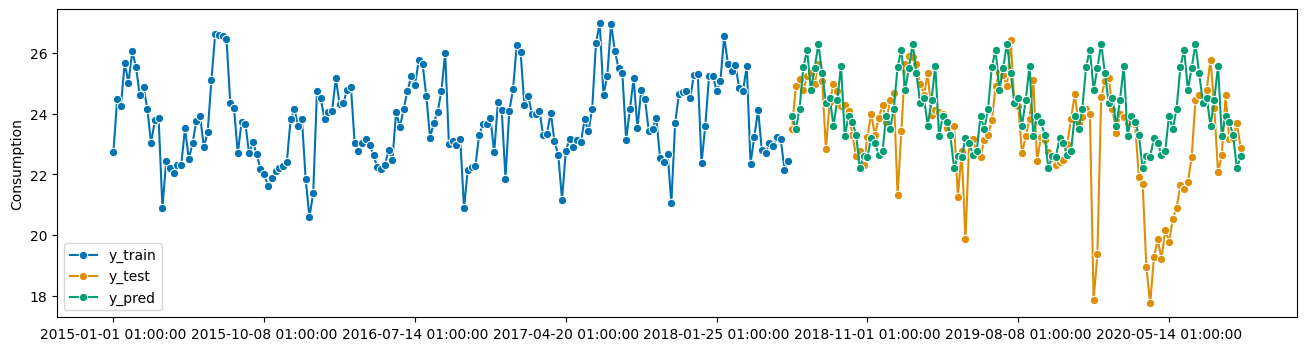

In [39]:
from sklearn.neighbors import KNeighborsRegressor

REGRESSION_WINDOW = 15
N_NEIGHBOURS = 2

regressor  = KNeighborsRegressor(n_neighbors=N_NEIGHBOURS)
forecaster = make_reduction(regressor, window_length=REGRESSION_WINDOW, strategy="recursive")

forecaster.fit(y_train)

y_pred = forecaster.predict(fh)

plot_series(y_train, y_test, y_pred, labels=["y_train", "y_test", "y_pred"])

print(f'sMAPE = {smape(y_pred.values, y_test.values):.3f}')

Результат незначительно хуже чем у наивного предсказания **sMAPE = 0.047**

# Выбор параметров модели SARIMA и сравнение выбранных методов предсказаний и результатов работы настроенной модели.

In [40]:
from statsmodels.tsa.stattools import adfuller
from sktime.utils.plotting import plot_series
from sktime.forecasting.sarimax import SARIMAX
from sktime.forecasting.arima import AutoARIMA
from sktime.forecasting.base import ForecastingHorizon

## Проверка стационарности ряда

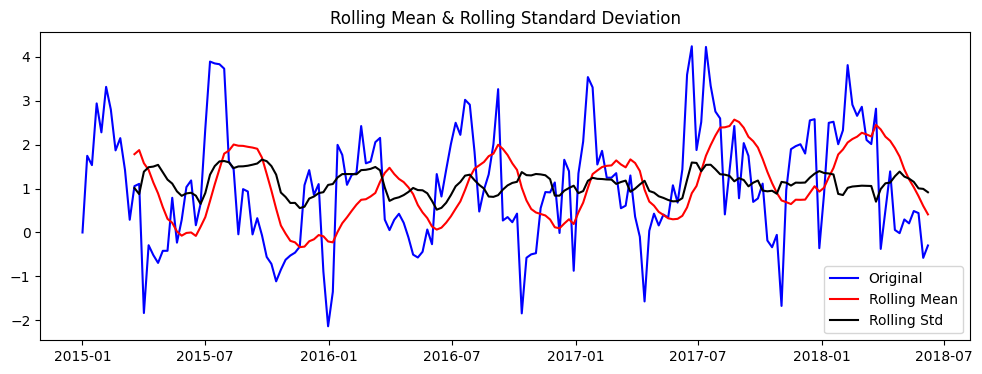

In [41]:
rolling_mean = y_train.rolling(window = 12).mean()
rolling_std  = y_train.rolling(window = 12).std()
plt.figure(figsize=(12,4), dpi=100)

plt.plot(y_train-y_train[0], color='blue', label='Original')
plt.plot(rolling_mean-y_train[0], color='red', label='Rolling Mean')
plt.plot(rolling_std, color='black', label='Rolling Std')

plt.legend(loc='best')
plt.title('Rolling Mean & Rolling Standard Deviation')
plt.show()

In [42]:
P_THRESHOLD = 0.05
def check_ADF(y, p_threshold = P_THRESHOLD):
    result = adfuller(y)
    adf_value = result[0]
    p_value   = result[1]
    print('ADF Statistic: {:.4f}'.format(adf_value))
    print('p value:', p_value)
    print('Critical Values:')
    for key, value in result[4].items():
        print(f"\t{key}: {value:.4f}, {'outperformed' if adf_value > value else ''}")
    print(f'Result: The series is {"not " if p_value < p_threshold else ""}stationary')
    return result

check_ADF(y_train, p_threshold = P_THRESHOLD);

ADF Statistic: -5.6950
p value: 7.912891363987447e-07
Critical Values:
	1%: -3.4674, 
	5%: -2.8778, 
	10%: -2.5755, 
Result: The series is not stationary


Ряд не стационарен

## Классическое дифференцирование

Попробуем добиться стационарности классическим дифференцированием

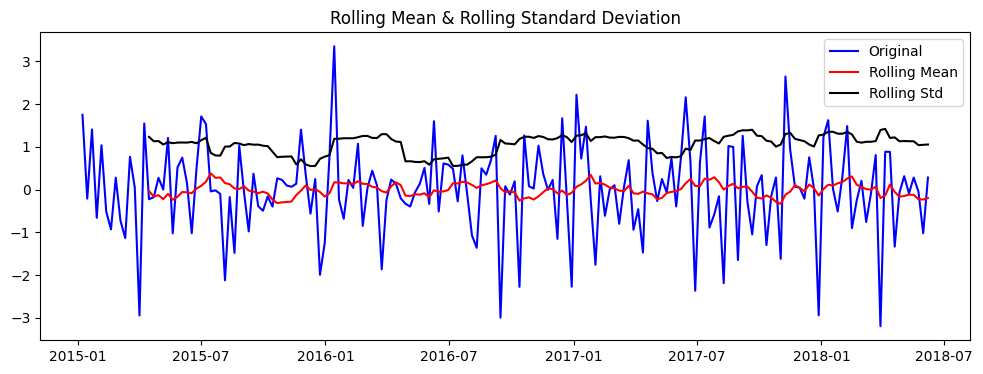

ADF Statistic: -12.8951
p value: 4.365736588278076e-24
Critical Values:
	1%: -3.4678, 
	5%: -2.8780, 
	10%: -2.5756, 
Result: The series is not stationary


In [43]:
y_diff = y_train[:].diff(1).dropna()

rolling_mean = y_diff.rolling(window = 15).mean()
rolling_std  = y_diff.rolling(window = 15).std()

plt.figure(figsize=(12,4), dpi=100)

plt.plot(y_diff, color='blue', label='Original')
plt.plot(rolling_mean, color = 'red', label='Rolling Mean')
plt.plot(rolling_std, color='black', label='Rolling Std')

plt.legend(loc = 'best')
plt.title('Rolling Mean & Rolling Standard Deviation')
plt.show()

result = check_ADF(y_diff)

Ряд всё ещё не страционарен. Попробуем сезонное дифференцирование

## Сезонное дифференцирование

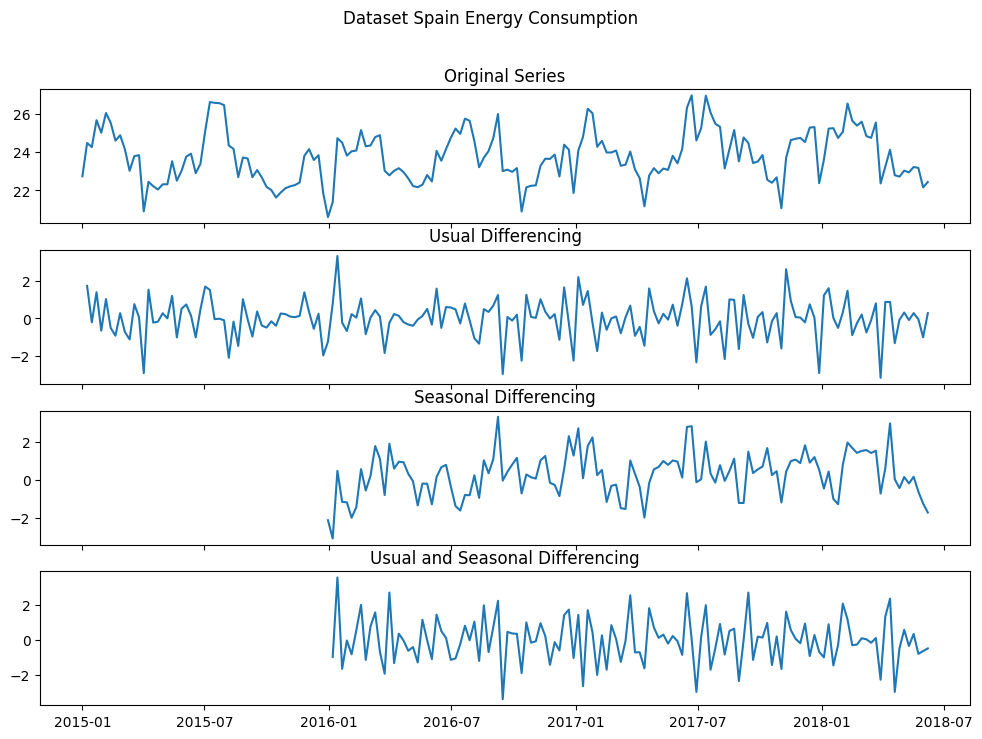

In [44]:
SEASON = 52

# Plot
fig, axes = plt.subplots(4, 1, figsize=(12,8), dpi=100, sharex=True)

# Original Series
axes[0].plot(y_train[:])
axes[0].set_title('Original Series')

# Usual Differencing
axes[1].plot(y_train[:].diff(1))
axes[1].set_title('Usual Differencing')

# Seasonal Differencing
axes[2].plot(y_train[:].diff(SEASON))
axes[2].set_title('Seasonal Differencing')

# Seasonal and Usual Differencing
axes[3].plot(y_train[:].diff(1).diff(SEASON))
axes[3].set_title('Usual and Seasonal Differencing')

plt.suptitle('Dataset Spain Energy Consumption', fontsize=12)
plt.show()

In [45]:
y_sdif = y_train[:].diff(1).diff(SEASON).dropna()
results = check_ADF(y_sdif)

ADF Statistic: -13.5471
p value: 2.44953758867773e-25
Critical Values:
	1%: -3.4838, 
	5%: -2.8850, 
	10%: -2.5793, 
Result: The series is not stationary


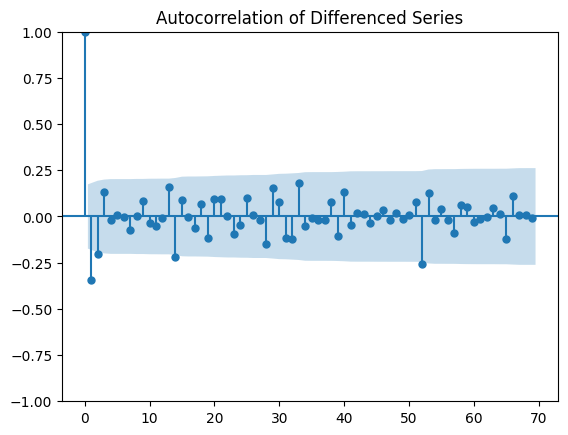

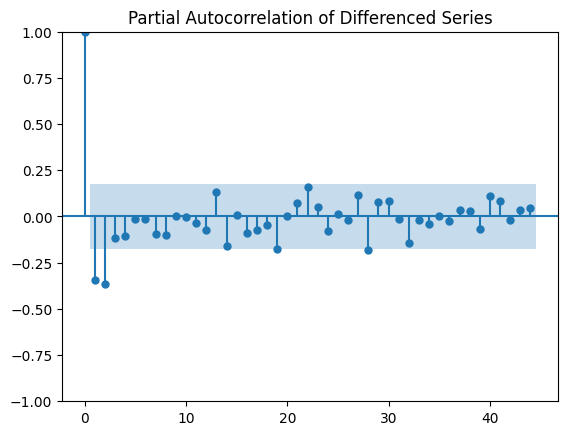

In [46]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

# Usual Differencing
plot_acf(y_sdif, title='Autocorrelation of Differenced Series', lags=np.arange(70) )
plt.show()
# Usual Differencing
plot_pacf(y_sdif, title='Partial Autocorrelation of Differenced Series', method='ywm', lags=np.arange(45))
plt.show()

In [47]:
forecaster = SARIMAX(order=(1, 1, 1), seasonal_order=(0, 1, 0, SEASON))
forecaster.fit(y_train)                                                         
print(forecaster.summary())

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.07403D+00    |proj g|=  5.24176D-02

At iterate    5    f=  1.07067D+00    |proj g|=  3.61708D-02

At iterate   10    f=  1.06190D+00    |proj g|=  9.57341D-02


 This problem is unconstrained.



At iterate   15    f=  1.05737D+00    |proj g|=  2.37153D-02

At iterate   20    f=  1.05612D+00    |proj g|=  4.91722D-02

At iterate   25    f=  1.05600D+00    |proj g|=  5.68032D-03

At iterate   30    f=  1.05599D+00    |proj g|=  1.20516D-02

At iterate   35    f=  1.05598D+00    |proj g|=  6.14751D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     35     57      1     0     0   6.148D-03   1.056D+00
  F =   1.0559826449478482     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
                                      SARIMAX Results                                      
Dep. Variable:       


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


## SARIMAX report conclusion:

Объяснение Вывода Алгоритма L-BFGS-B и Результатов Модели SARIMAX
Вывод Алгоритма L-BFGS-B

- Machine Precision: Наименьшее число, которое может быть представлено на машине (2.220D-16).
- N и M: Параметры алгоритма, где N - количество переменных в задаче оптимизации (4), а M - количество коррекций, используемых в обновлении BFGS (10).

- Iterations: Прогресс алгоритма на протяжении нескольких итераций, показывающий значение функции (f), которую минимизируют, и норму проектированного градиента (|proj g|).
    - - f: Значение функции на текущей итерации.
    - - |proj g|: Норма проектированного градиента, мера близости решения к оптимуму.

- Convergence Message: "CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH" указывает на то, что алгоритм сошёлся к решению.

- Final Statistics:
    - - Tit (Общее количество итераций), Tnf (Общее количество оценок функции) и т.д.
    - - Projg (Норма конечного проектированного градиента)
    - - F (Конечное значение функции)

Резюме Модели SARIMAX:

- Показаны параметры модели (например, ar.L1, ma.L1), их стандартные ошибки, z-оценки и доверительные интервалы.
- Представлены диагностические показатели модели, такие как тест Льюнга-Бокса, тест Жарка-Бера и меры гетероскедастичности.

### Визуальная проверка

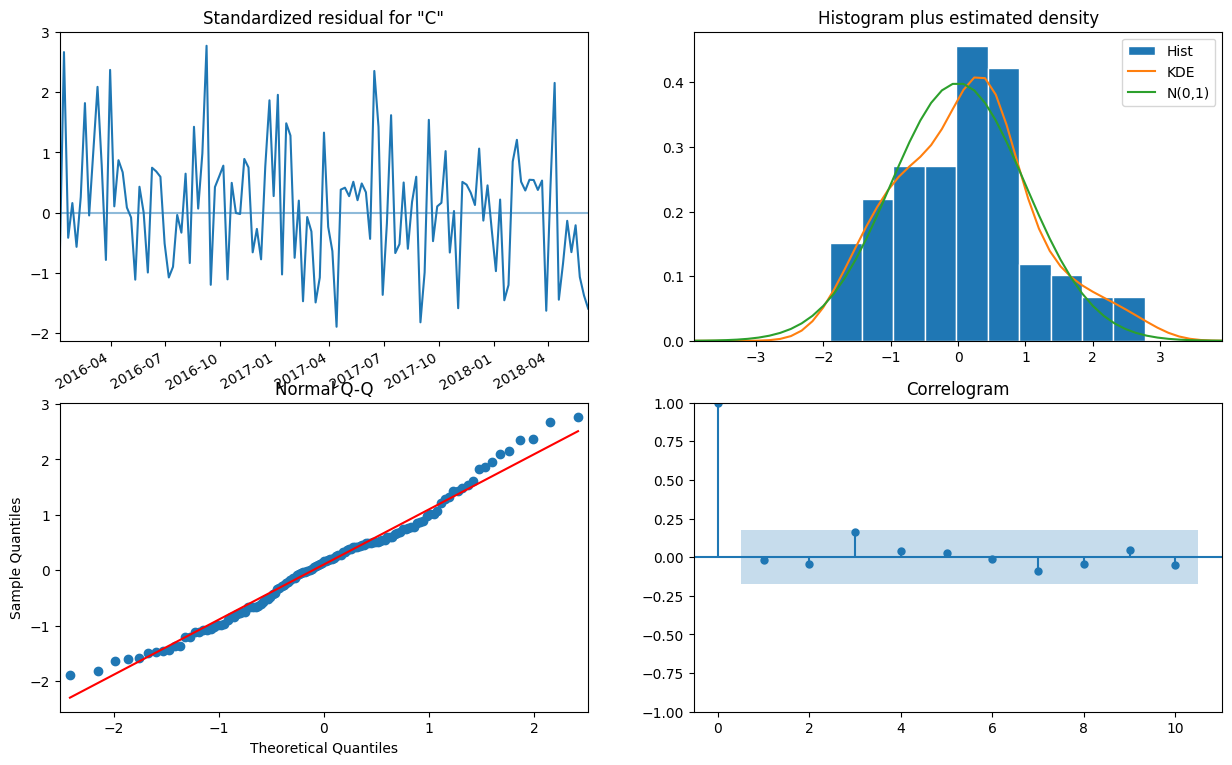

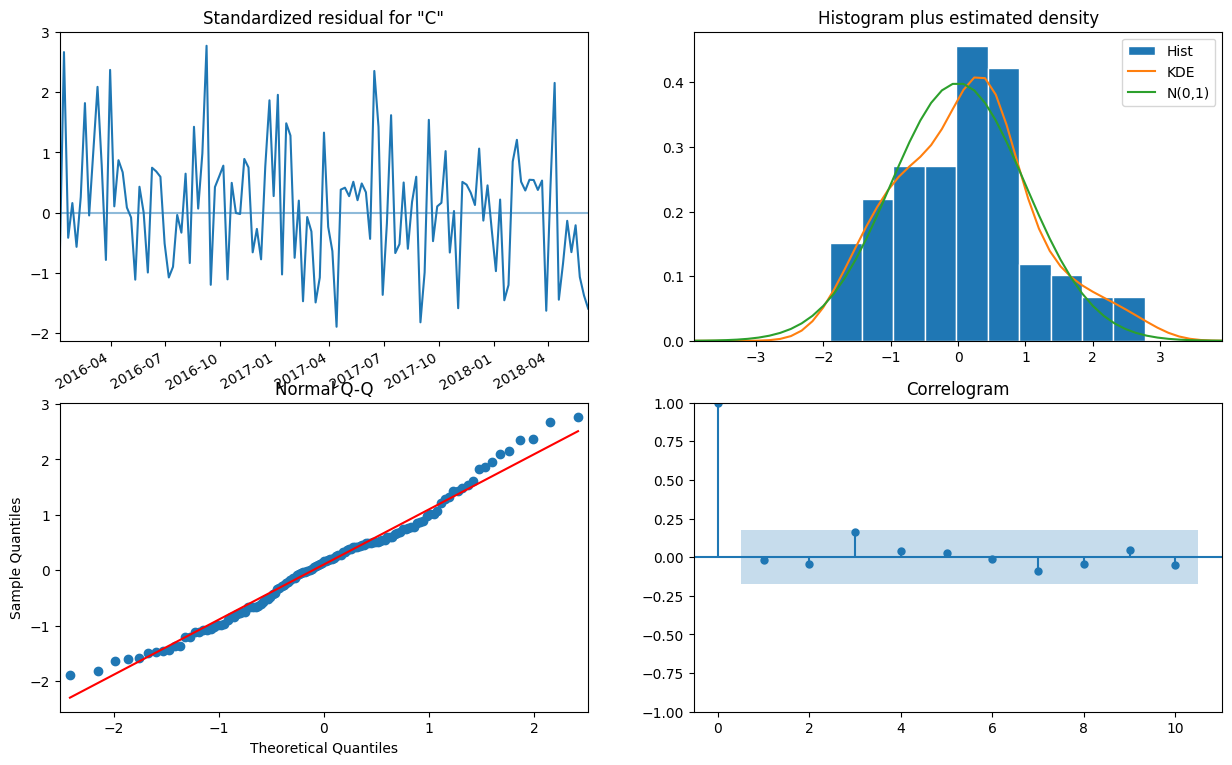

In [48]:
forecaster._fitted_forecaster.plot_diagnostics(figsize=(15, 10))

Визуализируем предсказание модели

sMAPE = 0.109


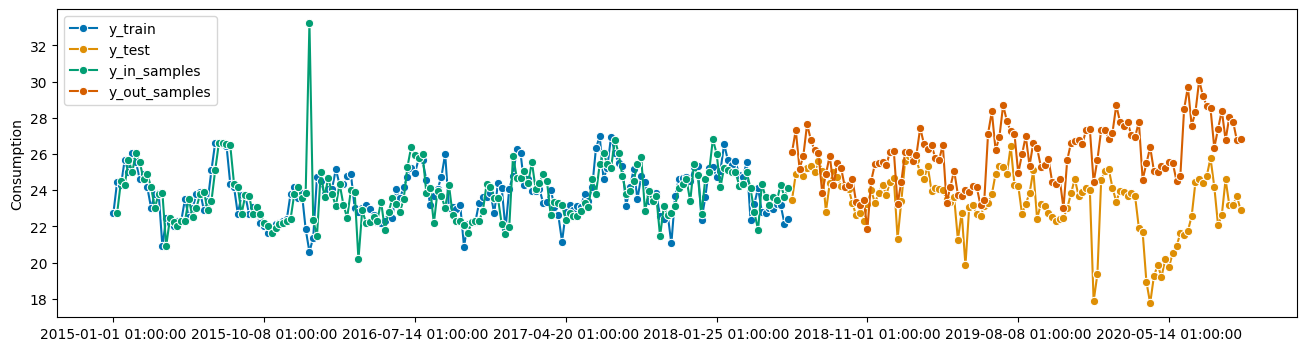

In [49]:
fhin = ForecastingHorizon(y_train.index[1:], is_relative=False)
y_in_samples = forecaster.predict(fhin)

fhout = ForecastingHorizon(y_test.index, is_relative=False)
y_out = forecaster.predict(fhout)

plot_series(y_train, y_test, y_in_samples, y_out, labels=["y_train", "y_test", "y_in_samples", "y_out_samples"])

print(f'sMAPE = {smape(y_out.values, y_test.values):.3f}')

 sMAPE = 0.109 означает, что в среднем прогнозы модели отклоняются от фактических значений на 10.9%. Попробуем улучшить предсказание применив сдвиг

sMAPE = 0.066


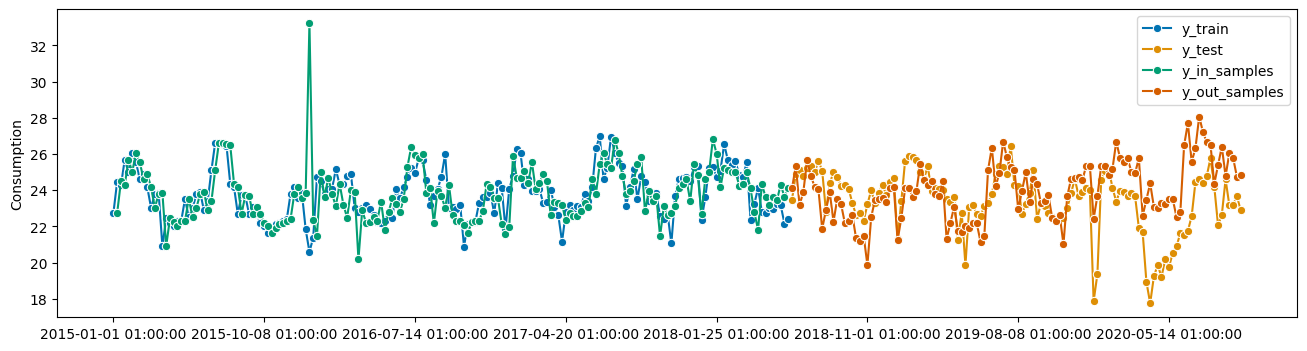

In [50]:
SHIFT = 2
y_out = forecaster.predict(fhout) - SHIFT

plot_series(y_train, y_test, y_in_samples, y_out, labels=["y_train", "y_test", "y_in_samples", "y_out_samples"])

print(f'sMAPE = {smape(y_out.values, y_test.values):.3f}')

Используя небольшой сдвиг удалось улучшить предсказание до 0.066

## Auto ARIMA

Попробуем подобрать параметры для модели ARIMA автоматически

In [51]:
model = AutoARIMA(
    start_p=1,  # начальный порядок AR
    d=1,        # Порядок производной
    start_q=0,  # начальный порядок MA
    max_p=5,    # конечный порядок AR
    max_q=5,    # конечный порядок MA
    seasonal=True,  # Использовать SARIMA
    start_P=0,  # начальный порядок SAR
    start_Q=0,  # начальный порядок SMA
    D=1,        # Порядок сезонной производной
    sp=52,      # Период сезонности
    max_order=7, # Максимальный порядок p+q+P+Q
    trace=True,   # отчет он-лайн
    stepwise=True, # метод ускоренного выбора параметров.
    n_jobs =1,      # для stepwise паралельные вычисления не доступны
    error_action='ignore',
    suppress_warnings=True
    )
model.fit(y_train)

model.summary()

Performing stepwise search to minimize aic
 ARIMA(1,1,0)(0,1,0)[52] intercept   : AIC=412.057, Time=0.14 sec
 ARIMA(0,1,0)(0,1,0)[52] intercept   : AIC=425.892, Time=0.08 sec
 ARIMA(1,1,0)(1,1,0)[52] intercept   : AIC=399.582, Time=1.13 sec
 ARIMA(0,1,1)(0,1,1)[52] intercept   : AIC=inf, Time=6.91 sec
 ARIMA(0,1,0)(0,1,0)[52]             : AIC=423.893, Time=0.08 sec
 ARIMA(1,1,0)(2,1,0)[52] intercept   : AIC=inf, Time=4.48 sec
 ARIMA(1,1,0)(1,1,1)[52] intercept   : AIC=inf, Time=5.90 sec
 ARIMA(1,1,0)(0,1,1)[52] intercept   : AIC=inf, Time=5.48 sec
 ARIMA(1,1,0)(2,1,1)[52] intercept   : AIC=394.431, Time=4.81 sec
 ARIMA(1,1,0)(2,1,2)[52] intercept   : AIC=inf, Time=5.33 sec
 ARIMA(1,1,0)(1,1,2)[52] intercept   : AIC=inf, Time=15.65 sec
 ARIMA(0,1,0)(2,1,1)[52] intercept   : AIC=407.405, Time=4.02 sec
 ARIMA(2,1,0)(2,1,1)[52] intercept   : AIC=375.910, Time=6.14 sec
 ARIMA(2,1,0)(1,1,1)[52] intercept   : AIC=inf, Time=6.41 sec
 ARIMA(2,1,0)(2,1,0)[52] intercept   : AIC=inf, Time=5.50 se

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                  180
Model:             SARIMAX(2, 1, 0)x(2, 1, [1], 52)   Log Likelihood                -180.987
Date:                              Thu, 28 Dec 2023   AIC                            373.975
Time:                                      00:01:14   BIC                            391.040
Sample:                                  01-01-2015   HQIC                           380.908
                                       - 06-07-2018                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4634      0.077     -6.034      0.000      -0.614      -0.313
ar.L2         -0.3963      0.087     -4.550      0.000      -0.567      -0.226
ar.S.L52      -0.5711   1.23e+04  -4.63e-05      1.000   -2.42e+04    2.42e+04
ar.S.L104     -0.4585   6613.539  -6.93e-05      1.000    -1.3e+04     1.3e+04
ma.S.L52      -0.5432   3.12e+04  -1.74e-05      1.000   -6.11e+04    6.11e+04
sigma2         0.5226   8267.964   6.32e-05      1.000   -1.62e+04    1.62e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.29   Jarque-Bera (JB):                 0.32
Prob(Q):                              0.59   Prob(JB):                         0.85
Heteroskedasticity (H):               0.81   Skew:                             0.12
Prob(H) (two-sided):                  0.49   Kurtosis:                         2.92
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Лучшая модель на основании autoARIMA имеет следующие параметры: (2, 1, 0) (2, 1, 1, 52)

Построим предсказания на основании auto ARIMA

/home/dzailz/urfu/MFoML/.venv/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


sMAPE = 0.092


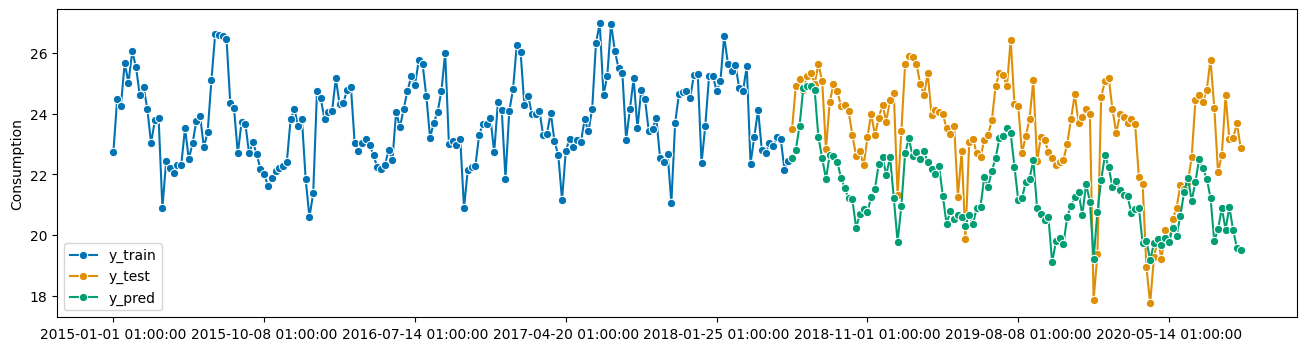

In [52]:
from sktime.forecasting.arima import ARIMA
from sktime.forecasting.compose import TransformedTargetForecaster
from sktime.transformations.series.detrend import Deseasonalizer

forecaster = TransformedTargetForecaster(
    [
        ("deseasonalize", Deseasonalizer(model="multiplicative", sp=SEASON)),
        ("forecast", ARIMA(order=(2, 1, 0), seasonal_order=(2, 1, 1, SEASON),)),
    ]
)

forecaster.fit(y_train)

fh = ForecastingHorizon(y_test.index, is_relative=False)

y_pred = forecaster.predict(fh)

plot_series(y_train, y_test, y_pred, labels=["y_train", "y_test", "y_pred"])

print(f'sMAPE = {smape(y_pred.values, y_test.values):.3f}')
# После удаления тренда здесь также хороший результат

Результат хуже чем у baseline

/home/dzailz/urfu/MFoML/.venv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.
00:01:20 - cmdstanpy - INFO - Chain [1] start processing
00:01:20 - cmdstanpy - INFO - Chain [1] done processing


sMAPE = 0.070


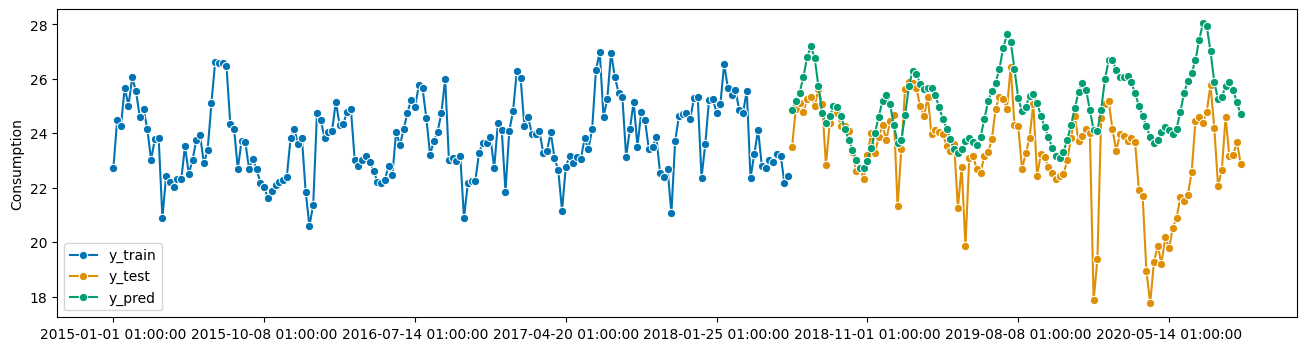

In [53]:
from sktime.forecasting.fbprophet import Prophet

forecaster = Prophet(
    freq='7d',
    seasonality_mode='multiplicative',
    add_country_holidays={'country_name': 'Spain'},
    yearly_seasonality=True
    )

forecaster.fit(y_train)
fh = ForecastingHorizon(y_test.index, is_relative=False)
y_pred = forecaster.predict(fh)
plot_series(y_train, y_test, y_pred, labels=["y_train", "y_test", "y_pred"])
print(f'sMAPE = {smape(y_pred, y_test):.3f}')

Визуально, если бы не ковидный спад потребления энергии, то модель была бы ближе к фактическим значениям

# Анализ выбранного однопеременного ряда на предмет классификации его сегментов

### Helpers

In [54]:
def split_by_month(df, months):
    df_ = pd.DataFrame()
    for month in np.atleast_1d(months):
        df_ = pd.concat((df_, df.loc[df.index.month == month]), axis=0)
    return df_

def to_segments(df, column, size = 24):
    df.index.hour[0]
    start_idx = 24-df.index.hour[0]
    df = df.iloc[start_idx:]
    val = df[[column]].values
    return val[:size*(val.size//size)].reshape(-1,size)

## Для анализа возьмём потребление энергии в Финляндии

In [55]:
df = extract_country(df_all, country_code='FI', year_min=2015, year_max=2019)
cols_map = {
    "load_actual_entsoe_transparency" : "Consumption",
    "wind_onshore_generation_actual" : "Wind"
    }
df = transform_dataframe(df, cols_map).dropna()

## Сегментирование данных

In [56]:
column = "Consumption"
winter = to_segments(split_by_month(df, [1, 2, 12]), column, size = 24)
summer = to_segments(split_by_month(df, [6, 7, 8]), column, size = 24)
autumn = to_segments(split_by_month(df, [9, 10, 11]), column, size = 24)
spring = to_segments(split_by_month(df, [3, 4, 5]), column, size = 24)
print(winter.shape, summer.shape, autumn.shape, spring.shape)

(450, 24) (458, 24) (453, 24) (459, 24)


### Отобразим результат

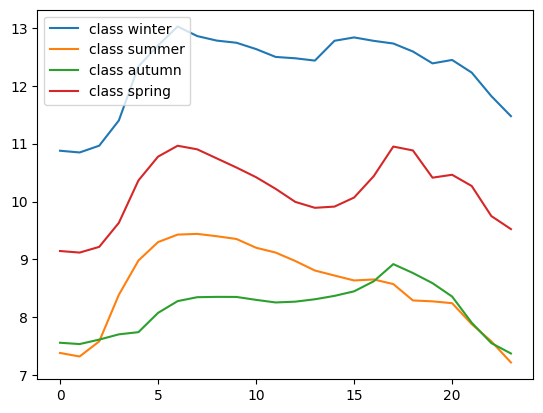

In [57]:
plt.figure()
day = 10
for i,(c, d) in enumerate(zip([winter,summer,autumn,spring],['winter','summer','autumn','spring'])):
    plt.plot(c[day], label="class " + str(d))
plt.legend(loc="best")
plt.show()
plt.close()

## Подготовка данных для классификации

In [58]:
from sklearn.model_selection import train_test_split
from sktime.datatypes import convert_to

X = np.concatenate((winter,summer,autumn,spring))
y = np.concatenate(
    (
        0 * np.ones(winter.shape[0]),
        1 * np.ones(summer.shape[0]),
        2 * np.ones(autumn.shape[0]),
        3 * np.ones(spring.shape[0])
        )
    )
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(1274, 24) (1274,) (546, 24) (546,)


In [59]:
df_train = convert_to(np.atleast_3d(X_train).transpose(0,2,1), to_type="nested_univ")
df_test  = convert_to(np.atleast_3d(X_test ).transpose(0,2,1), to_type="nested_univ")

## RandomIntervalFeatureExtractor + RandomForest

In [60]:
from sktime.transformations.panel.summarize import RandomIntervalFeatureExtractor
from sktime.utils.slope_and_trend import _slope
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier

steps = [(
        "extract",  RandomIntervalFeatureExtractor(
            n_intervals="sqrt", features=[np.mean, np.std, _slope]
        )),
    ("clf", RandomForestClassifier()),]

clf = Pipeline(steps)
clf.fit(df_train, y_train)
print(f' test score {clf.score(df_test, y_test):.3f}')

 test score 0.947


RandomIntervalFeatureExtractor + RandomForest 0.9

In [61]:
from sktime.classification.dictionary_based import (
    ContractableBOSS,
    IndividualBOSS,
    IndividualTDE,
    MUSE, 
    WEASEL
    )

RANDOM_STATE = 42
boss = IndividualBOSS(random_state=RANDOM_STATE,)

cboss = ContractableBOSS(random_state=RANDOM_STATE,)

itde = IndividualTDE(random_state=RANDOM_STATE,)

muse = MUSE(random_state=RANDOM_STATE,)

weasel = WEASEL(random_state=RANDOM_STATE,)

for model, name in zip([boss, cboss ,itde, muse, weasel], ['IndividualBOSS', 'ContractableBOSS' ,'IndividualTDE', 'MUSE', 'WEASEL']):
    model.fit(X_train, y_train)
    print(f"{name} score: {model.score(X_test, y_test):.3f}")

IndividualBOSS score: 0.879
ContractableBOSS score: 0.951
IndividualTDE score: 0.883
MUSE score: 0.962
WEASEL score: 0.958


Лучший результат показала модель  MUSE с результатом 0.962

## RandomForestClassifier & KNeighborsClassifier

In [62]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

clf = RandomForestClassifier(n_estimators=100, n_jobs=-1)
clf.fit(X_train, y_train)
print(f'RandomForestClassifier score: {clf.score(X_test, y_test):.3f}')
clf = KNeighborsClassifier(n_neighbors=1, n_jobs=-1)
clf.fit(X_train, y_train)
print(f'KNeighborsClassifier score: {clf.score(X_test, y_test):.3f}')

RandomForestClassifier score: 0.941
KNeighborsClassifier score: 0.943


Случайный лес показал результат 0.941, а KNeighborsClassifier 0.943

## SummaryClassifier & Catch22Classifier

In [63]:
from sktime.classification.feature_based import SummaryClassifier, Catch22Classifier
from sklearn.ensemble import RandomForestClassifier

# Описание временных рядов суммарными статистиками.
clf = SummaryClassifier(estimator=RandomForestClassifier(n_estimators=100), n_jobs=-1, random_state=RANDOM_STATE)
clf.fit(X_train, y_train) 
print(f'SummaryClassifier {clf.score(df_test, y_test):.3f}')

# Описание временного ряда указанным признаковым пространством.
clf = Catch22Classifier(estimator=RandomForestClassifier(n_estimators=100), n_jobs=-1, random_state=RANDOM_STATE)
clf.fit(X_train, y_train) 
print(f'Catch22Classifier {clf.score(df_test, y_test):.3f}')

SummaryClassifier 0.711
Catch22Classifier 0.914


Catch22Classifier показал результат 0.914

## Выводы:

Лучше всего повел себя классификатор на основе поиска паттернов Muse

# Исследование выбранной задачи классификации при помощи глубоких нейронных сетей в пакете tsai

In [64]:
from tsai.all import *

## Преобразование данных

In [65]:
X = np.concatenate(
    (
        winter,
        summer,
        autumn,
        spring
        )
    )
y = np.concatenate(
    (
        1*np.ones(winter.shape[0]),
        2*np.ones(summer.shape[0]),
        3*np.ones(autumn.shape[0]),
        4*np.ones(spring.shape[0])
        )
    )


X = np.atleast_3d(X).transpose(0,2,1)
y.astype(int)

array([1, 1, 1, ..., 4, 4, 4])

## Разметка классов

In [66]:
class_map = {
    1:'winter',
    2:'summer',
    3:'autumn',
    4:'spring',
}
labeler = ReLabeler(class_map)
y = labeler(y)

## Подготовка данных для обучения

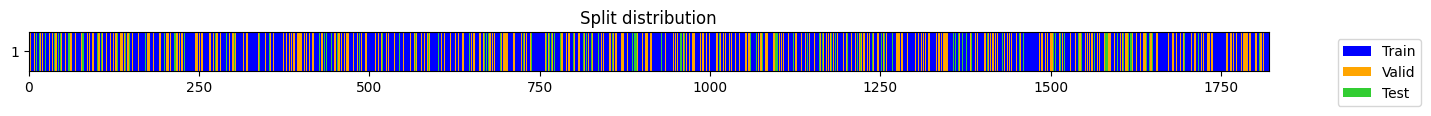

((#1092) [795,1078,424,644,362,105,1659,138,796,91...],
 (#546) [1579,1609,1037,1075,270,129,1736,609,1162,684...],
 (#182) [453,310,675,1545,80,826,101,79,979,1617...])

In [67]:
splits = get_splits(
    y,
    n_splits=1,                                                   # Устанавливаем количество разделений данных в 1 часть.
    valid_size=0.3,                                               # Размер валидационного набора данных составит 30% от всего набора данных.
    test_size=0.1,                                                # Размер тестового набора данных составит 10% от всего набора данных.
    shuffle=True,                                                 # Перемешиваем данные перед разделением.
    balance=False,                                                # Не выполняем балансировку классов при разделении данных.
    stratify=True,                                                # Сохраняем распределение классов в разбиениях пропорционально исходному набору данных.
    random_state=42,                                              # Устанавливаем начальное состояние генератора случайных чисел для воспроизводимости.
    show_plot=True,                                               # Отображаем график разделения данных.
    verbose=True                                                  # Включаем подробный вывод логов в процессе выполнения функции.
    )                                                 

splits

In [68]:
tfms  = [None, [Categorize()]]
dsets = TSDatasets(X, y, tfms=tfms, splits=splits)

bs = 256
dls   = TSDataLoaders.from_dsets(dsets.train, dsets.valid, bs=[bs, bs*2])

In [69]:
archs = [
    (RNNPlus,  {'n_layers':3, 'bidirectional': True}),                          # RNN модель с 3 скрытыми слоями и двунаправленной архитектурой.
    (LSTMPlus, {'n_layers':3, 'bidirectional': True}),                          # LSTM модель с 3 скрытыми слоями и двунаправленной архитектурой.
    (GRUPlus,  {'n_layers':3, 'bidirectional': True}),                          # GRU модель с 3 скрытыми слоями и двунаправленной архитектурой.
    (RNNPlus,  {'n_layers':4, 'bidirectional': True}),                          # RNN модель с 4 скрытыми слоями и двунаправленной архитектурой.
    (RNNPlus,  {'n_layers':4, 'bidirectional': False}),                         # RNN модель с 4 скрытыми слоями и однонаправленной архитектурой.
    (LSTM,     {'n_layers':3, 'bidirectional': False}),                         # LSTM модель с 3 скрытыми слоями и однонаправленной архитектурой.
    (RNN,      {'n_layers':3, 'bidirectional': True}),                          # RNN модель с 3 скрытыми слоями и двунаправленной архитектурой.
    (LSTM,     {'n_layers':3, 'bidirectional': True}),                          # LSTM модель с 3 скрытыми слоями и двунаправленной архитектурой.
    (GRU,      {'n_layers':3, 'bidirectional': True}),                          # GRU модель с 3 скрытыми слоями и двунаправленной архитектурой.
    (ResNet, {}),
    (InceptionTime, {}),                                                        # Архитектура InceptionTime.
    (XceptionTime,  {}),                                                        # Архитектура XceptionTime.
    (TCN, {}),                                                                  # Архитектура TCN.
    (LSTM_FCN, {}),                                                             # LSTM-FCN архитектура.
    (TST, {}),                                                                  # TST (Time Series Transformer) архитектура.
    (FCN, {}),                                                                  # Архитектура FCN (Fully Convolutional Network).
]

In [70]:
from IPython.display import clear_output

results = pd.DataFrame(columns=['arch', 'hyperparams', 'total params', 'train loss', 'valid loss', 'accuracy', 'time'])

for i, (arch, k) in enumerate(archs):

    model = create_model(arch, dls=dls, **k)

    print(model.__class__.__name__)

    learn = Learner(dls, model,  metrics=accuracy)
    start = time.time()
    learn.fit_one_cycle(20, 1e-3)
    elapsed = time.time() - start
    vals = learn.recorder.values[-1]
    results.loc[i] = [arch.__name__, k, count_parameters(model), vals[0], vals[1], vals[2], int(elapsed)]
    results.sort_values(by='accuracy', ascending=False, ignore_index=True, inplace=True)
    clear_output()
    display(results)

arch                              hyperparams  total params  \
0          ResNet                                       {}        478724   
1   InceptionTime                                       {}        388868   
2    XceptionTime                                       {}        399480   
3         RNNPlus   {'n_layers': 3, 'bidirectional': True}        142204   
4             TST                                       {}        411524   
5             FCN                                       {}        264580   
6         RNNPlus   {'n_layers': 4, 'bidirectional': True}        202604   
7        LSTM_FCN                                       {}        315380   
8         RNNPlus  {'n_layers': 4, 'bidirectional': False}         71304   
9             RNN   {'n_layers': 3, 'bidirectional': True}        142204   
10           LSTM  {'n_layers': 3, 'bidirectional': False}        203204   
11       LSTMPlus   {'n_layers': 3, 'bidirectional': True}        566404   
12           LSTM   {'n_layers': 3, 'bidirectional': True}        566404   
13            GRU   {'n_layers': 3, 'bidirectional': True}        425004   
14        GRUPlus   {'n_layers': 3, 'bidirectional': True}        425004   
15            TCN                                       {}         66754   

    train loss  valid loss  accuracy  time  
0     0.199186    0.106312  0.963370     2  
1     0.273965    0.139784  0.956044     4  
2     0.706428    0.623793  0.899267    11  
3     0.551301    0.320738  0.897436     2  
4     0.424419    0.269353  0.886447     5  
5     0.502488    0.364506  0.879121     1  
6     0.566298    0.361838  0.877289     3  
7     0.540137    0.387098  0.873626     1  
8     0.586560    0.382508  0.871795     1  
9     0.612776    0.427667  0.844322     2  
10    0.816073    0.603284  0.782051     2  
11    0.788666    0.600551  0.776557     6  
12    0.741477    0.540331  0.771062     6  
13    0.824683    0.674760  0.721612     6  
14    0.803045    0.650393  0.712454     7  
15    1.336563    1.296373  0.404762     5

### Выводы:

Лучший результат у InceptionTime

In [71]:
arch = InceptionTime
model = create_model(arch, dls=dls)
model = build_ts_model(InceptionTime, dls=dls)

## Поиск оптимального learning rate

SuggestedLRs(valley=0.0030199517495930195)

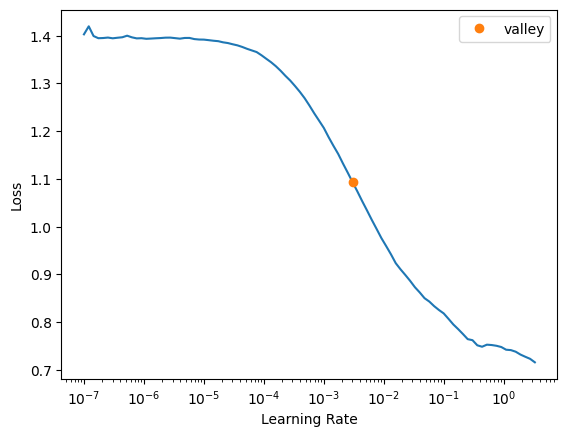

In [72]:
learn = ts_learner(dls, arch=model, metrics=accuracy, opt_func=RAdam)
learn.lr_find()

Подобранный learning rate 1e-3

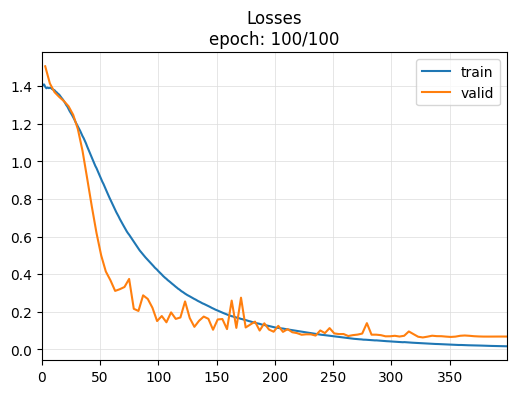

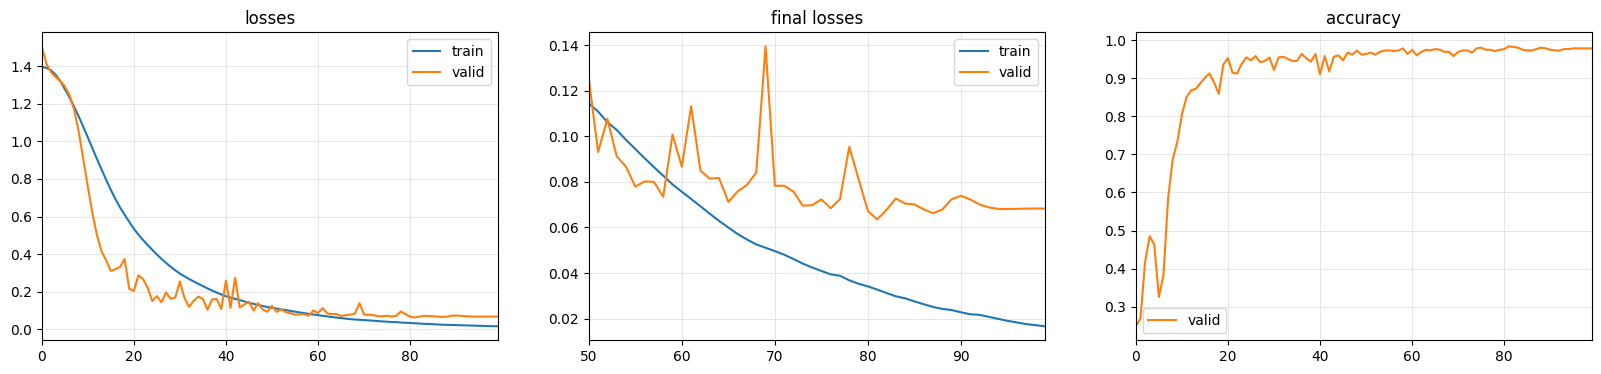

In [73]:
learn = Learner(dls, model,  metrics=accuracy, opt_func=RAdam)
start = time.time()
learn.fit_one_cycle(n_epoch=100, lr_max=1e-3, cbs=ShowGraph(),)

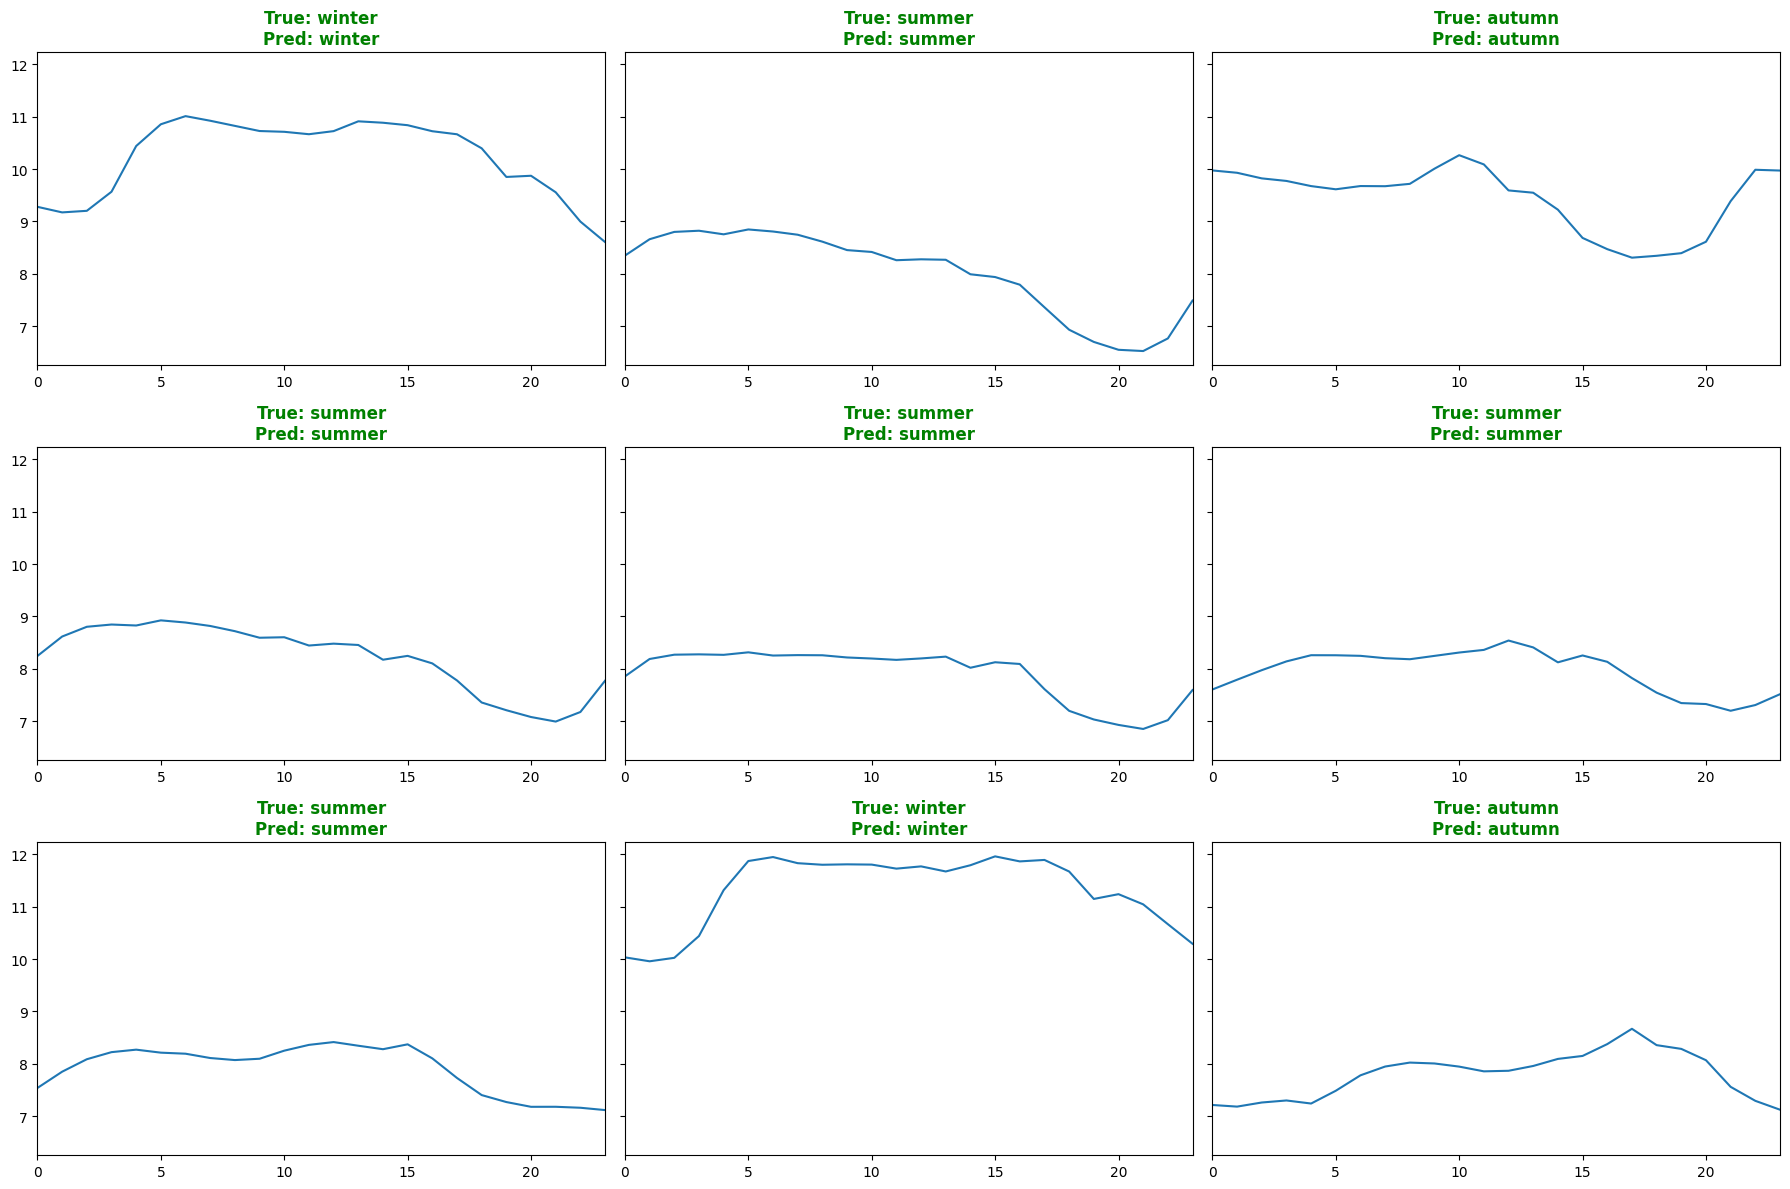

In [74]:
learn.show_results(sharey=True)

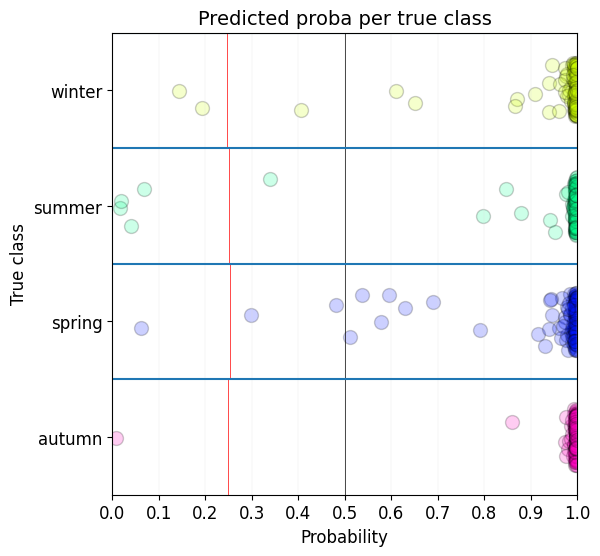

In [75]:
learn.show_probas()

In [76]:
probas, _, preds = learn.get_X_preds(X[splits[2]])

In [77]:
class_map = {
    'winter':3,
    'summer':2,
    'autumn':0,
    'spring':1,
    }
class_map

labeler = ReLabeler(class_map)
from sklearn.metrics import accuracy_score

accuracy_score(np.argmax(probas,axis=-1), labeler(y[splits[2]]))

0.989010989010989

## Выводы:

Удалось добиться результата в 98% Но пример конечно синтечтический.

# Выявление аномалий во временном ряду

### Helpers

In [78]:
def plot_anomalies(data, anomalies, figsize=(12, 4)):
    fig, ax = plt.subplots(figsize=(12, 4))
    plt.plot(data, color='darkblue', alpha=0.4)
    for idx, anomaly in enumerate(anomalies):
        if anomaly:
            y_value = data.iloc[idx]
            plt.scatter(x=data.index[idx], y=y_value, color='b', alpha=0.7)

Востановим датасет из backup

In [79]:
df = df_bk.copy()

Создадим скользящее среднее, скользящее стандартное отклонение,  для столбца 'Consumption' с окном в 24 часа и 7 дней

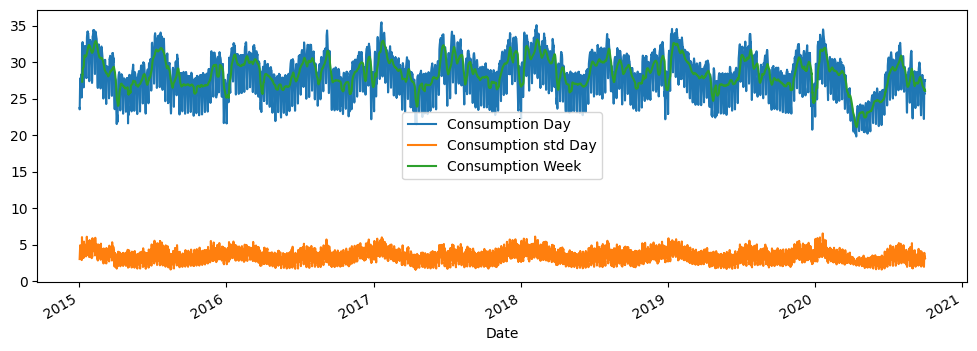

In [80]:
fig, ax = plt.subplots(figsize=(12,4))
df['Consumption'].rolling(24).mean().plot(ax=ax, label='Consumption Day')
df['Consumption'].rolling(24).std().plot(ax=ax, label='Consumption std Day')
df['Consumption'].rolling(24*7).mean().plot(ax=ax, label='Consumption Week')
ax.legend()

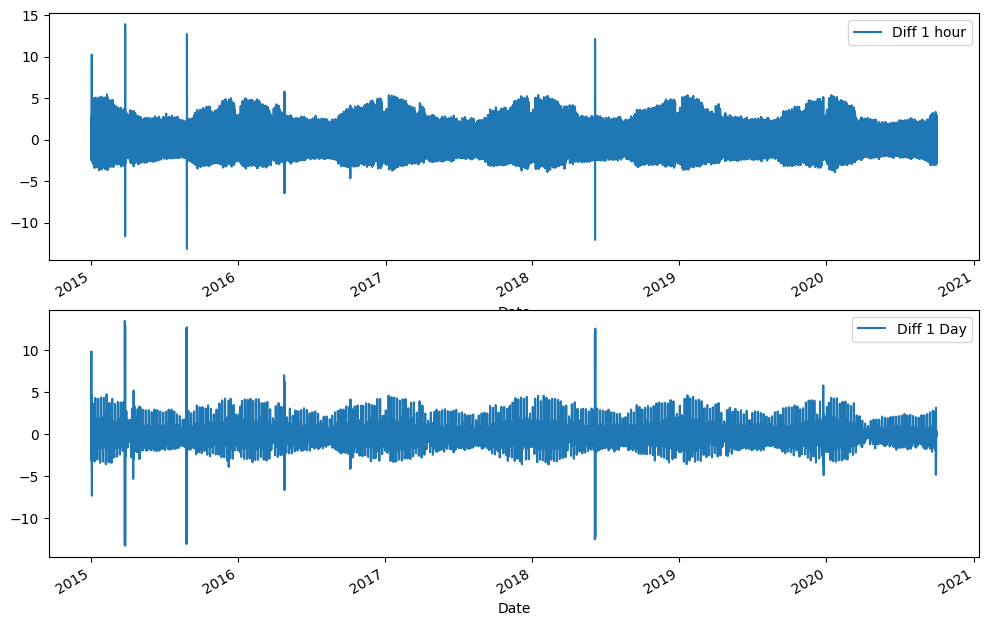

In [81]:
fig, ax = plt.subplots(2, figsize=(12,8),)
df['Consumption'].diff(1).plot(ax=ax[0], label='Diff 1 hour')
df['Consumption'].diff(24).diff(1).plot(ax=ax[1], label='Diff 1 Day')
ax[0].legend(); ax[1].legend()

Явно видны выбросы в данных в период с 2015 по 2016 год, а так же с 2018 по 2019 год, к тому же специально были выбраны даты в которые попадает ковидный спад потребления энергии

## Сезонное декомпозирования временного ряда

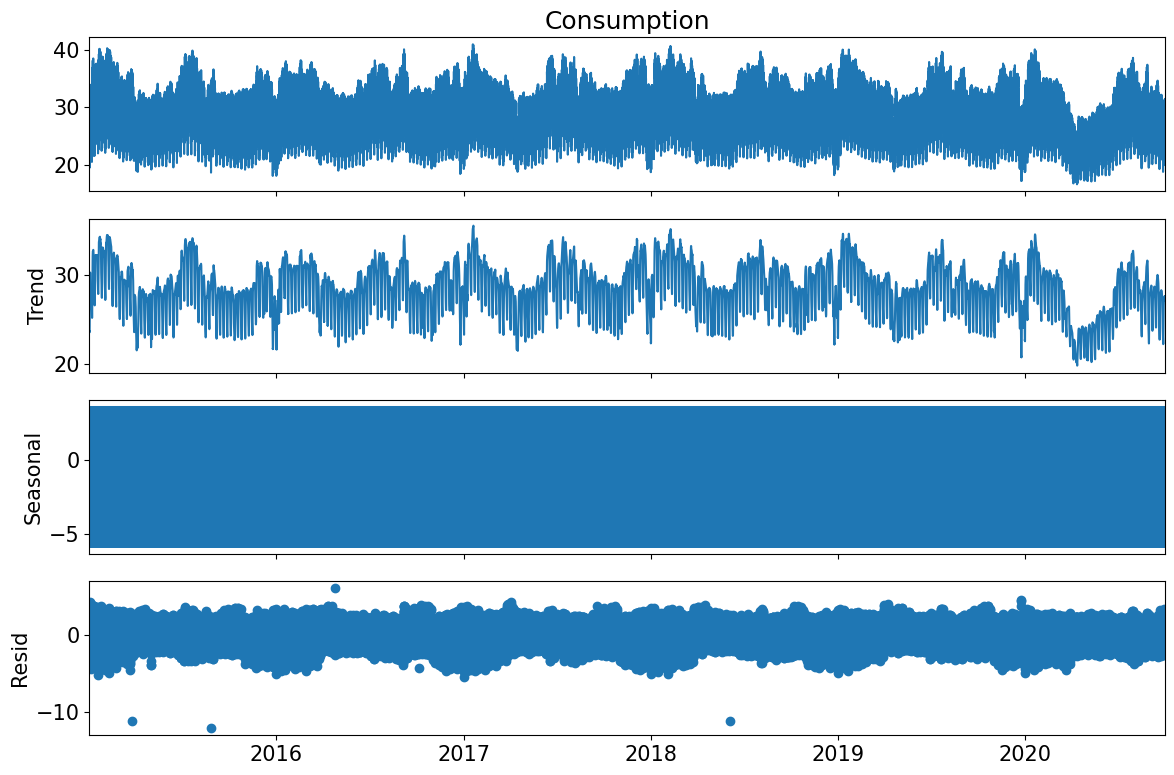

In [82]:
from statsmodels.tsa.seasonal import seasonal_decompose
plt.rc('figure',figsize=(12,8))
plt.rc('font',size=15)

df_dk = df.loc["2015-01-01 01:00:00":"2020-09-30 22:00:00",:].asfreq('1h').fillna(method='bfill')

result = seasonal_decompose(df_dk['Consumption'], model='additive')
fig = result.plot()

Тренд ровный

## Экспоненйиальное сглаживание и график остатков

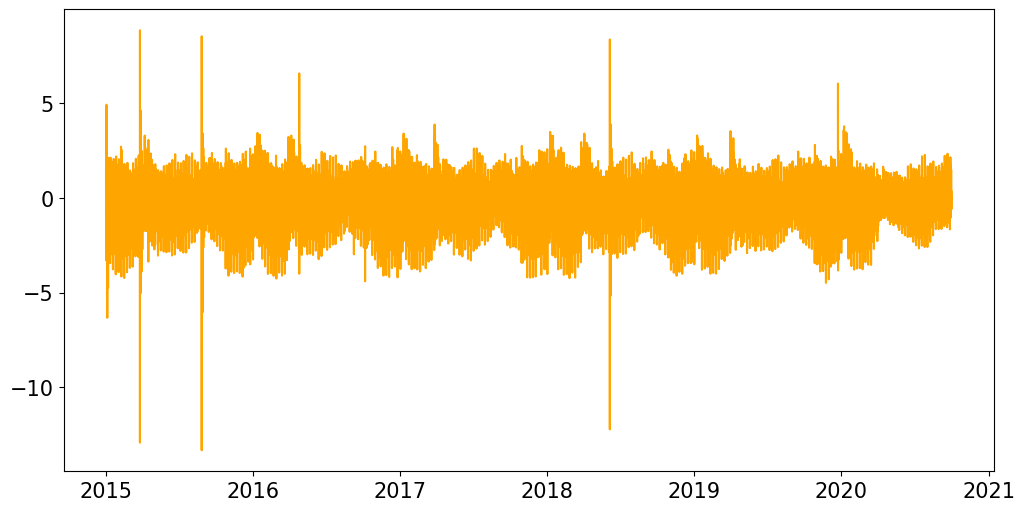

In [83]:
from statsmodels.tsa.api import ExponentialSmoothing

y = df_dk['Consumption'].values.reshape(-1, 1)

forecaster = ExponentialSmoothing(y,seasonal_periods=48,trend="add",seasonal="add").fit()
predicts = forecaster.predict(start=0, end=len(y)-1)

plt.rc('figure',figsize=(12,6))
plt.plot(df_dk.index, y.reshape(-1) - predicts, color='orange')

## Наивные методы

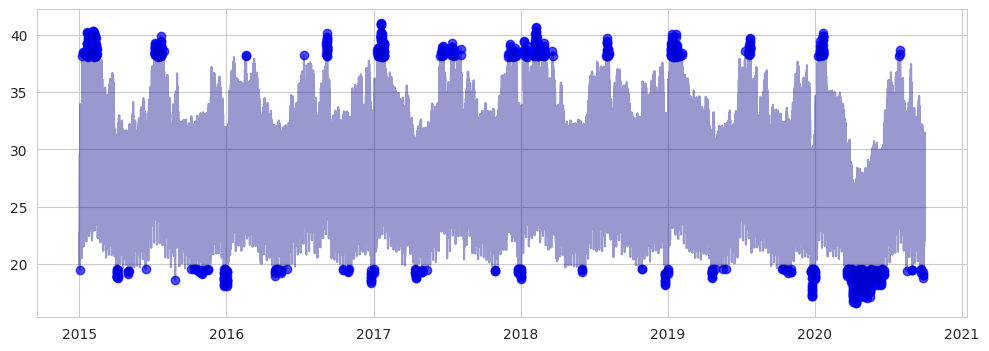

In [84]:
from adtk.detector import QuantileAD


plt.style.use('default')
sns.set_style("whitegrid")

quantile_ad = QuantileAD(high=0.99, low=0.01)
anomalies = quantile_ad.fit_detect(df_dk['Consumption'])
plot_anomalies(df_dk['Consumption'], anomalies=anomalies)

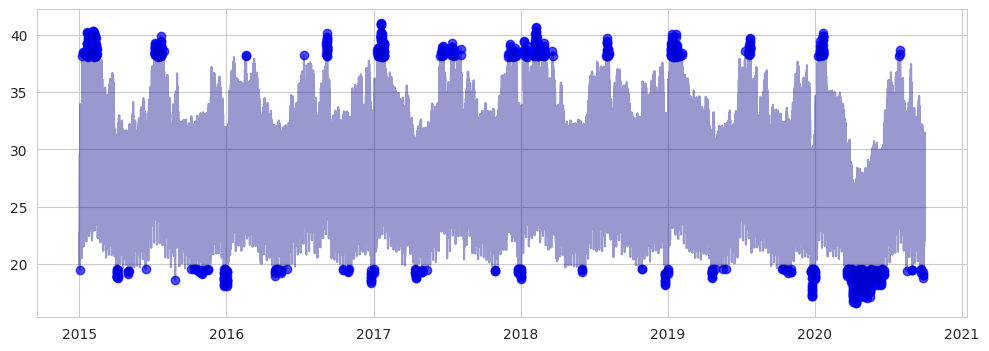

In [85]:
from adtk.detector import ThresholdAD
threshold_val = ThresholdAD(high=27000, low=1000)
anomalies_thresh = threshold_val.detect(df_dk['Consumption'])
anomalies_thresh.value_counts()

plot_anomalies(df_dk['Consumption'], anomalies=anomalies)

## Volatility Shift Index

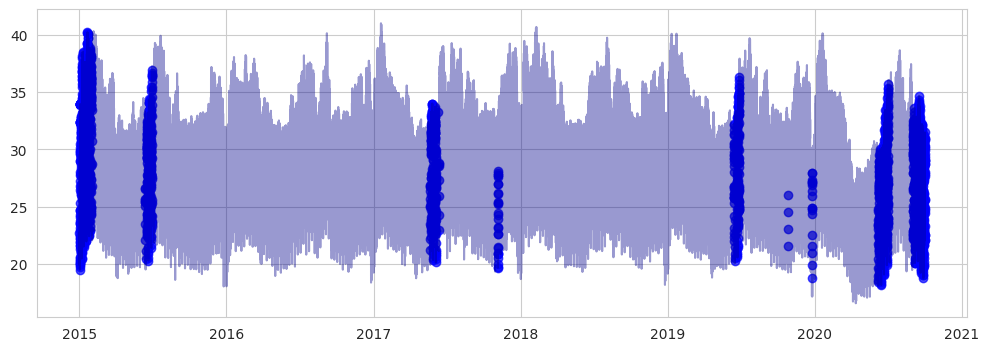

In [86]:
from adtk.detector import VolatilityShiftAD
volatility_shift_ad = VolatilityShiftAD(c=1.0, side='positive', window=24*30)
anomalies = volatility_shift_ad.fit_detect(df_dk['Consumption'])
plot_anomalies(df_dk['Consumption'], anomalies=anomalies)

## Left Shift детекция аномалий

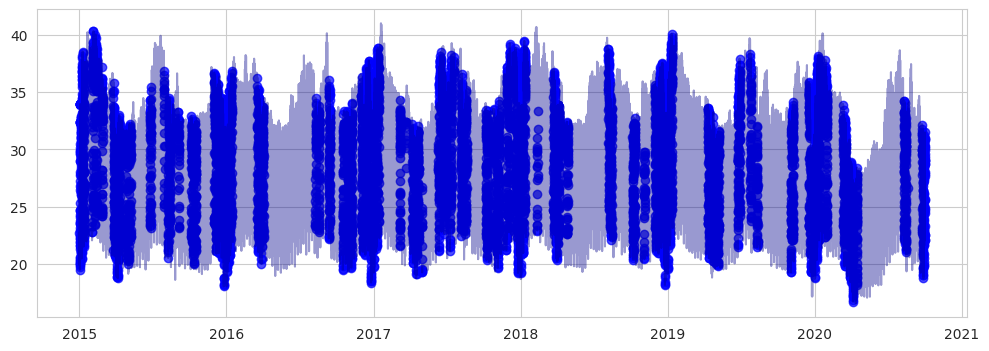

In [87]:
from adtk.detector import LevelShiftAD
level_shift_ad = LevelShiftAD(c=0.2, side='both', window=24*7)
anomalies = level_shift_ad.fit_detect(df_dk['Consumption'])
plot_anomalies(df_dk['Consumption'], anomalies=anomalies)

### Выводы

Результаты детекции аномалий с помощью Left Shift и Volatility Shift  крайне посредственные, возможно это связано с тем, что в данных есть сезонность

In [88]:
df_dk.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 50398 entries, 2015-01-01 01:00:00 to 2020-09-30 22:00:00
Freq: H
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Consumption  50398 non-null  float64
 1   Wind         50398 non-null  float64
 2   Solar        50398 non-null  float64
 3   Green        50398 non-null  float64
dtypes: float64(4)
memory usage: 1.9 MB


## Детекция на основе сезонного паттерна

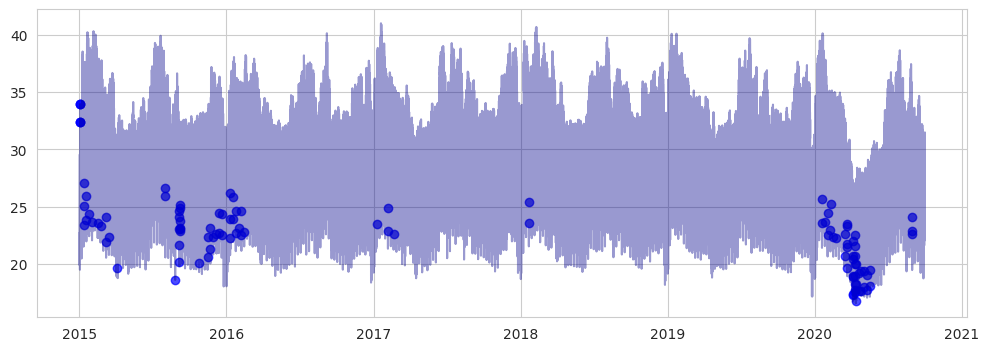

In [89]:
from adtk.detector import SeasonalAD
seasonal_vol = SeasonalAD(freq=24*365,)
anomalies = seasonal_vol.fit_detect(df_dk['Consumption'])
anomalies.value_counts()
plot_anomalies(df_dk['Consumption'], anomalies=anomalies)

### Выводы

Исключив годовой сезонный фактор удалось получить довольно интересный результат с которым можно работать, особенно радует, что в этом случае модель очень хорошо обнаружина аномалии в период ковидного спада

## Inter Quartile Range Anomaly Detection

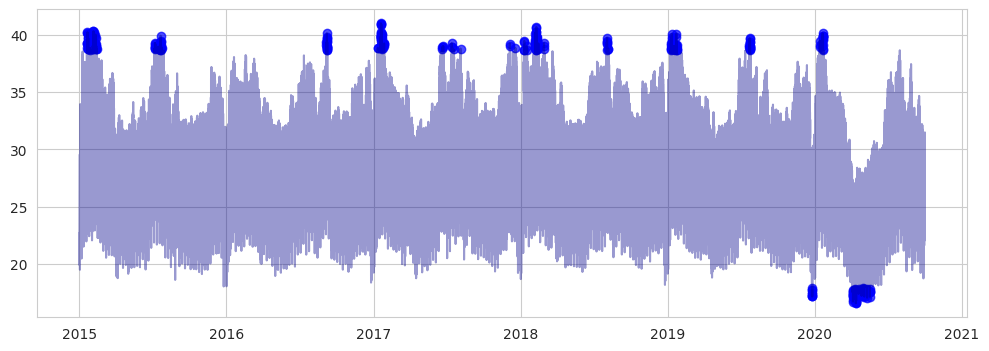

In [90]:
from adtk.detector import InterQuartileRangeAD
iqr_ad = InterQuartileRangeAD(c=0.9)
anomalies = iqr_ad.fit_detect(df_dk['Consumption'])
plot_anomalies(df_dk['Consumption'], anomalies=anomalies)

Результат не плох, смущает обнаружеие аномалий в основном в верхней части спектра, но ковидный спад модель обнаружила, хотя и не идеально.

## LocalOutlierFactor с поддержкой режима "новизны"

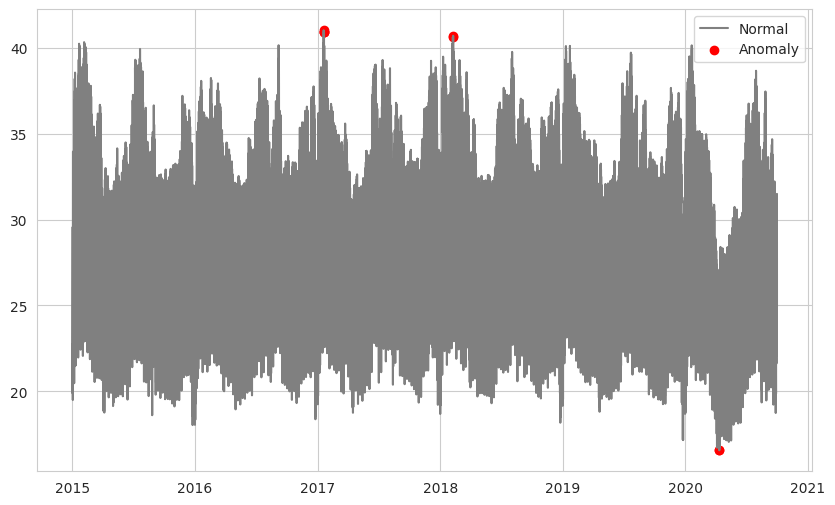

In [91]:
from sklearn.neighbors import LocalOutlierFactor

lof = LocalOutlierFactor(novelty=True)

lof.fit(y)

df_dk['anomaly_LOF'] = lof.predict()


fig, ax = plt.subplots(figsize=(10,6))

a = df_dk.loc[df_dk['anomaly_LOF'] == -1, ['Consumption']] # anomaly

ax.plot(df_dk.index, df_dk['Consumption'], color='grey', label = 'Normal')
ax.scatter(a.index, a['Consumption'], color='red', label = 'Anomaly')
plt.legend()
plt.show()

### Выводы
Было опробованно разное количество "соседей", но результат остается посредственным

## PyOD AutoEncoder

In [92]:
from pyod.models.auto_encoder import AutoEncoder

clf = AutoEncoder(hidden_neurons =[1, 64, 64, 1])
clf.fit(y)
y_scores = clf.decision_scores_

2023-12-28 00:05:11.575602: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-12-28 00:05:11.594284: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-28 00:05:11.594310: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-28 00:05:11.595314: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-28 00:05:11.598764: I tensorflow/core/platform/cpu_feature_guar

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 2         
                                                                 
 dropout (Dropout)           (None, 1)                 0         
                                                                 
 dense_1 (Dense)             (None, 1)                 2         
                                                                 
 dropout_1 (Dropout)         (None, 1)                 0         
                                                                 
 dense_2 (Dense)             (None, 1)                 2         
                                                                 
 dropout_2 (Dropout)         (None, 1)                 0         
                                                                 
 dense_3 (Dense)             (None, 64)                1

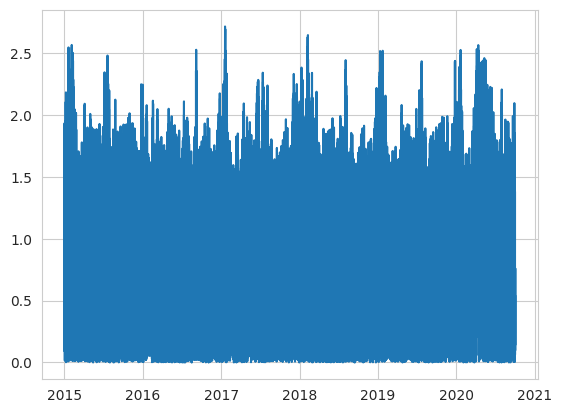

In [93]:
plt.plot(df_dk.index, y_scores)
plt.show()

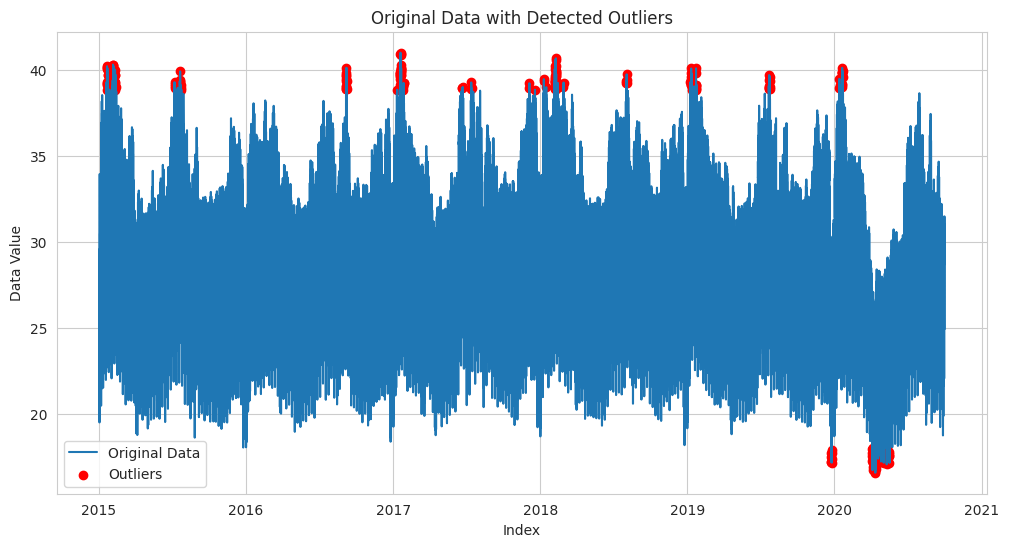

In [94]:
import matplotlib.pyplot as plt

# Plot original data
plt.figure(figsize=(12, 6))
plt.plot(df_dk.index, df_dk['Consumption'], label='Original Data')

# Overlay outliers

threshold = 2.25  # Define threshold for outliers
outliers = y_scores > threshold
plt.scatter(df_dk.index[outliers], df_dk['Consumption'][outliers], color='r', label='Outliers')

plt.xlabel('Index')
plt.ylabel('Data Value')
plt.title('Original Data with Detected Outliers')
plt.legend()
plt.show()




In [95]:
# Descriptive statistics for the entire dataset
overall_stats = df_dk['Consumption'].describe()

# Descriptive statistics for outliers
outlier_stats = df_dk['Consumption'][outliers].describe()

print("Overall Statistics:\n", overall_stats)
print("\nOutlier Statistics:\n", outlier_stats)


Overall Statistics:
 count    50398.000000
mean        28.442517
std          4.625733
min         16.575000
25%         24.581250
50%         28.524500
75%         31.992000
max         41.015000
Name: Consumption, dtype: float64

Outlier Statistics:
 count    288.000000
mean      32.253740
std       10.329671
min       16.575000
25%       17.751500
50%       39.038000
75%       39.470500
max       41.015000
Name: Consumption, dtype: float64


### Выводы
При правильно подобраном treashold можно получить неплохой результат